In [ ]:
from kafka import KafkaConsumer
import json
import pandas as pd
import time
from uuid import uuid4
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load RoBERTa sentiment model and tokenizer
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Function to analyze sentiment using RoBERTa
def analyze_sentiment_roberta(text):
    encoded_input = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    with torch.no_grad():
        output = model(**encoded_input)
    scores = output.logits[0].softmax(dim=0).numpy()
    sentiment_labels = ['negative', 'neutral', 'positive']
    sentiment_index = np.argmax(scores)
    return sentiment_labels[sentiment_index], float(scores[sentiment_index])

# Kafka consumer config
consumer = KafkaConsumer(
    'safaricom_tweets',
    bootstrap_servers='localhost:9092',
    auto_offset_reset='latest',
    enable_auto_commit=True,
    group_id=f'session-{uuid4()}',
    value_deserializer=lambda x: json.loads(x.decode('utf-8'))
)

print("🚀 Kafka tweet processor started... Only new tweets will be read.")

seen_ids = set()

while True:
    print("\n🕒 Polling for new messages...")
    tweets = []
    start_time = time.time()

    while time.time() - start_time < 30:
        raw_msgs = consumer.poll(timeout_ms=1000)
        for tp, messages in raw_msgs.items():
            for message in messages:
                tweet = message.value
                tweet_id = tweet.get("tweet_id", "")
                tweet_text = tweet.get("tweet_text", "")

                if tweet_id in seen_ids:
                    continue
                seen_ids.add(tweet_id)

                print(f"📥 Received tweet: {tweet_text}")

                # Sentiment analysis with RoBERTa
                sentiment_label, sentiment_score = analyze_sentiment_roberta(tweet_text)

                tweets.append({
                    "id": tweet_id,
                    "text": tweet_text,
                    "sentiment_label": sentiment_label,
                    "sentiment_score": sentiment_score
                })

    print(f"✅ Collected {len(tweets)} tweets in the last 30 seconds.")

    if tweets:
        df = pd.DataFrame(tweets)

        print("\n📊 Sentiment Analysis:")
        print(df[["text", "sentiment_label", "sentiment_score"]].to_string(index=False))

        df.to_csv("tweet_snapshot.csv", index=False)
        print("💾 Saved to tweet_snapshot.csv")
    else:
        print("❌ No new tweets this round.")

    print("\n🔁 Waiting for next batch...\n")
    time.sleep(5)

Listening for new tweets...



Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
P

C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


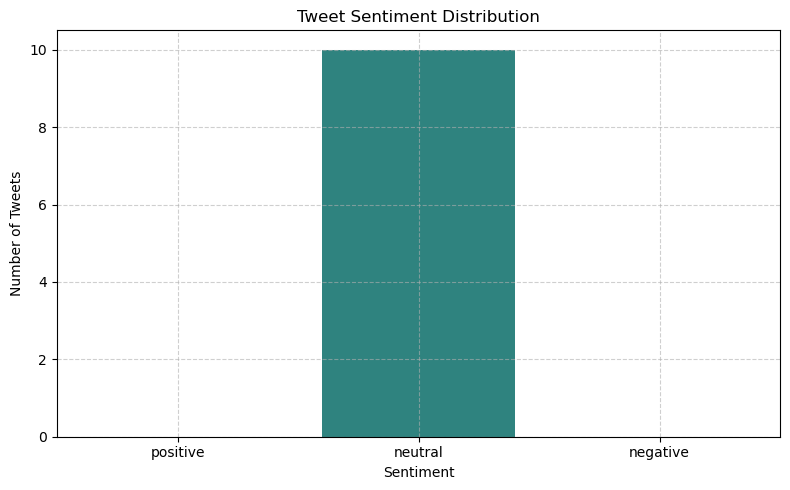

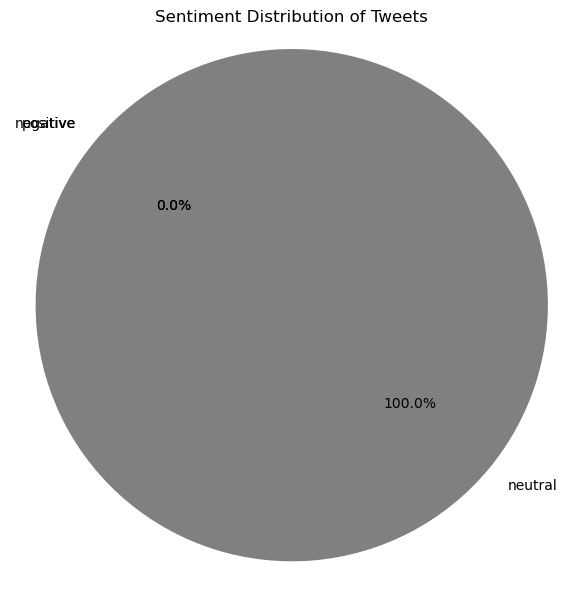

Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solic

C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


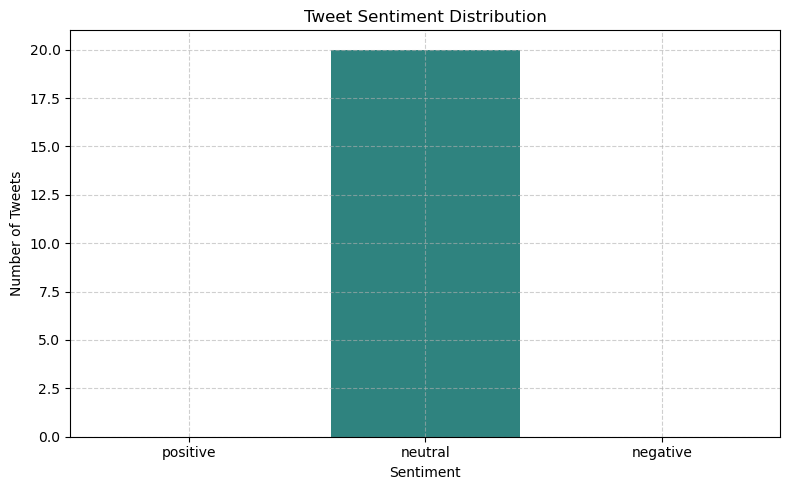

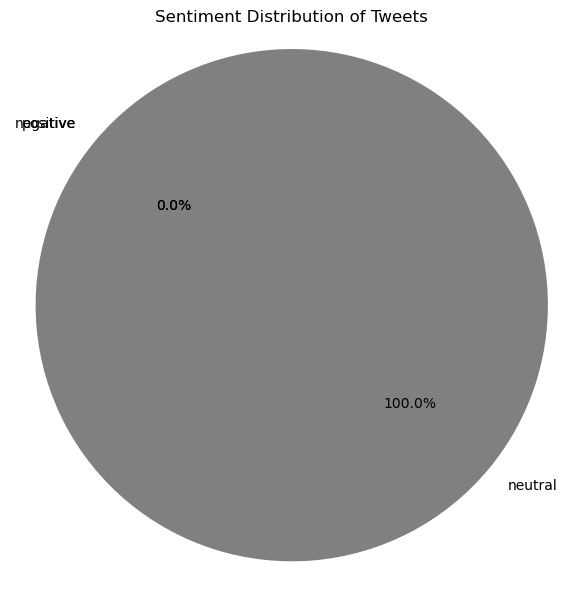

Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa


C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


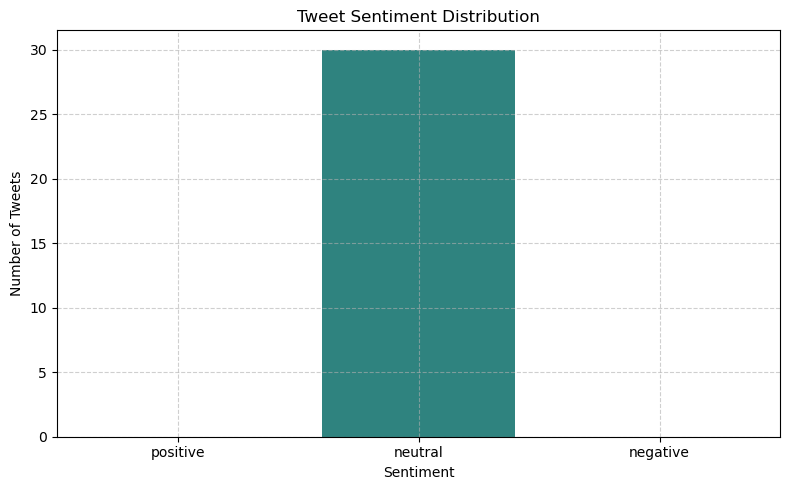

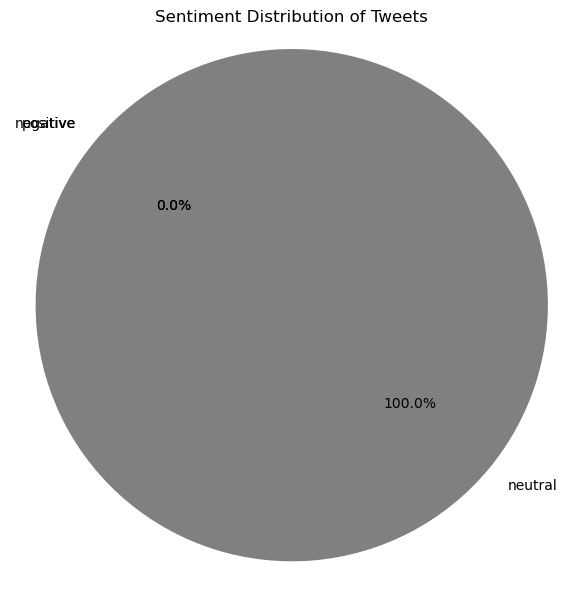

Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…


C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


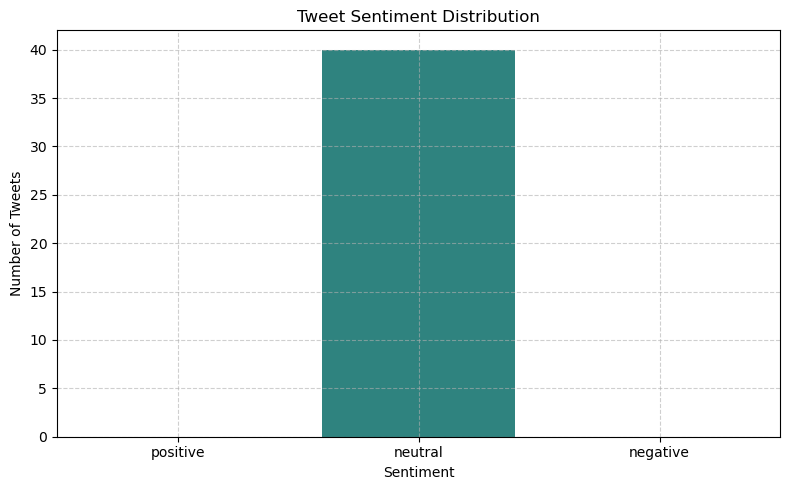

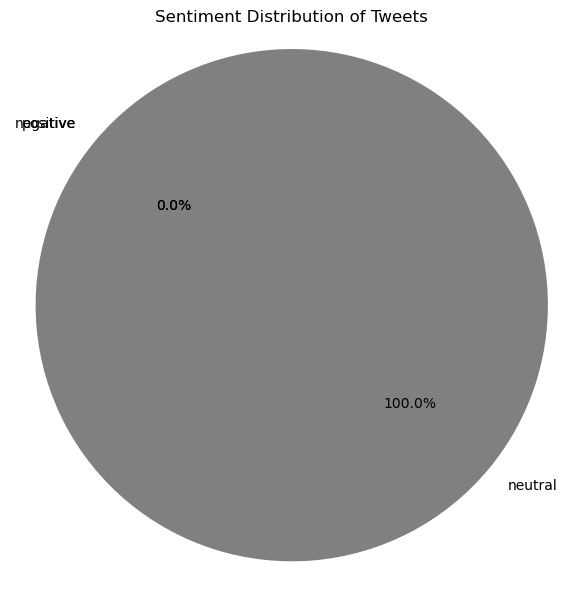

Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_

C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


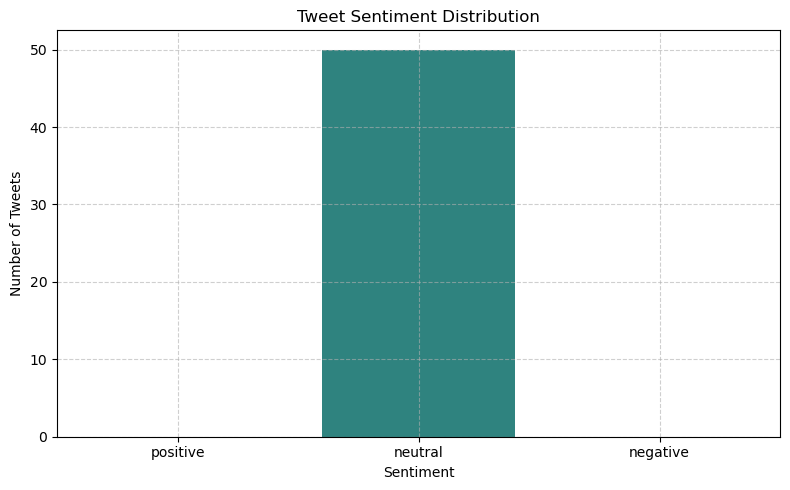

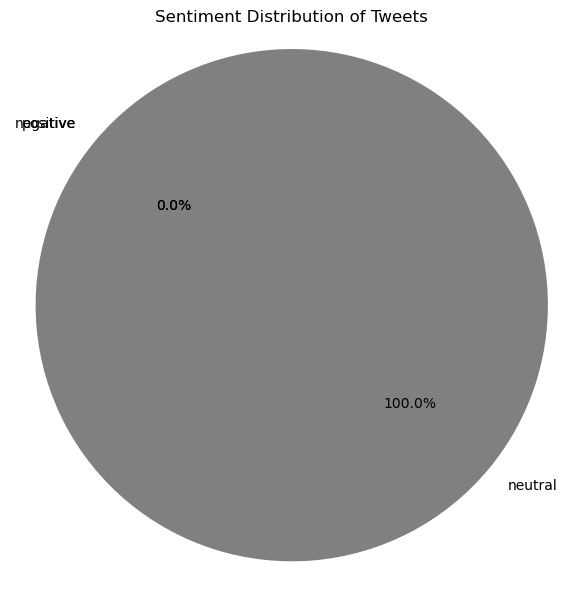

Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa


C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


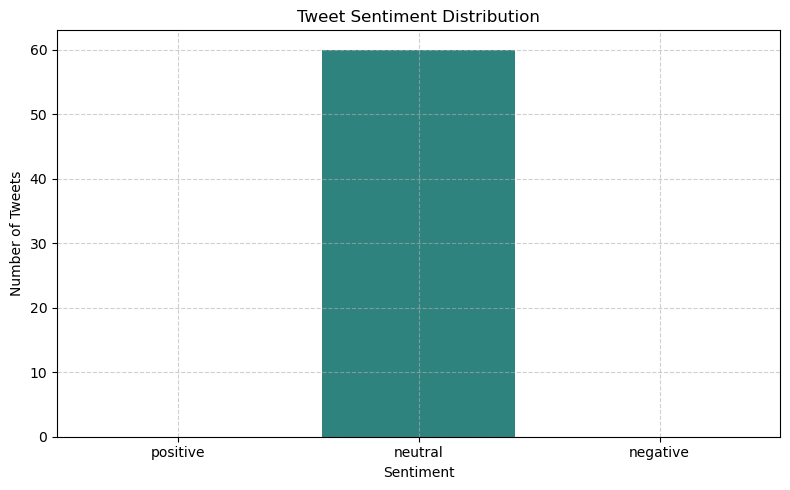

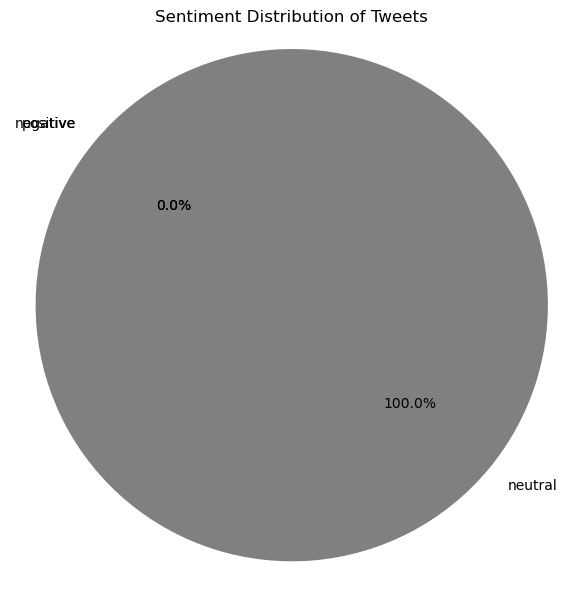

Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…


C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


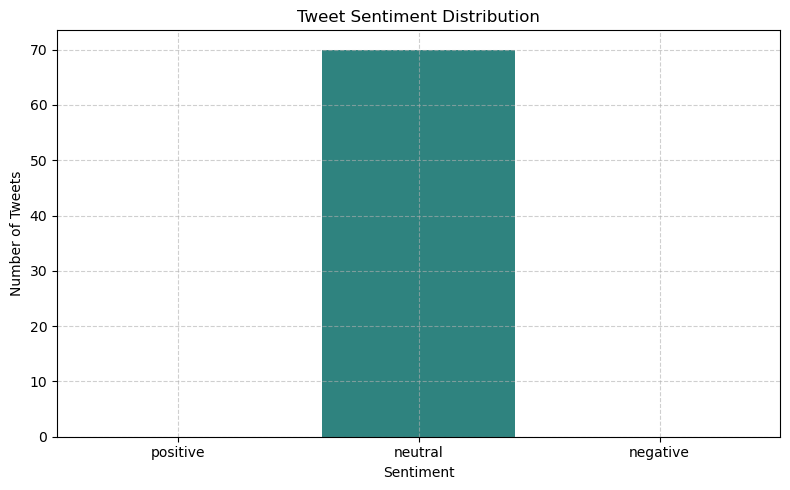

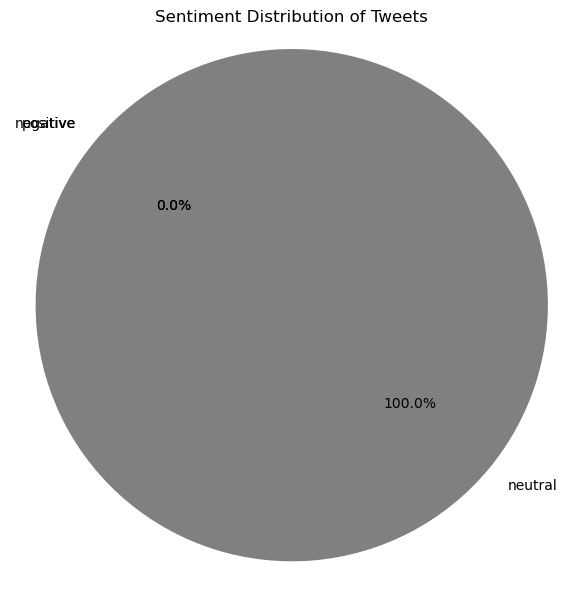

Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solic

C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


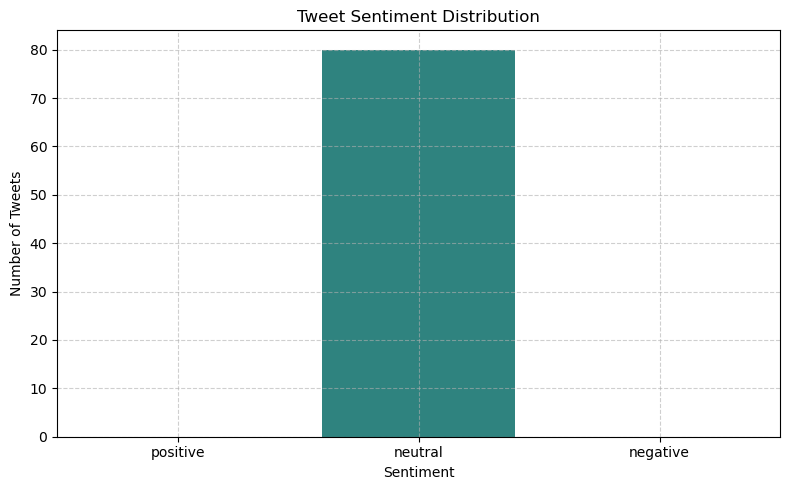

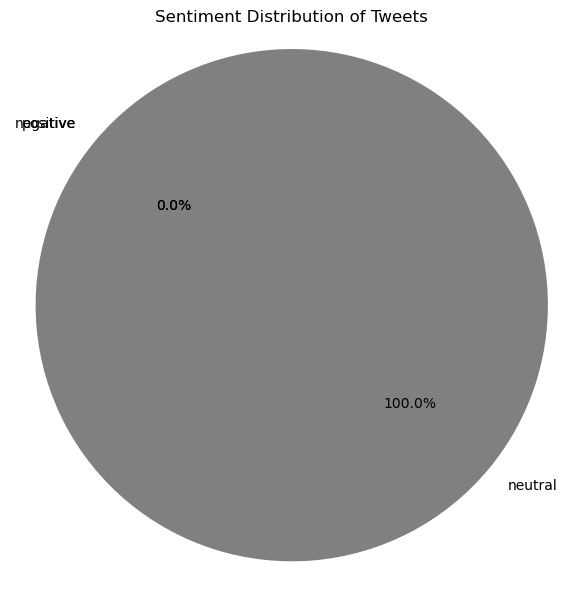

Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa


C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


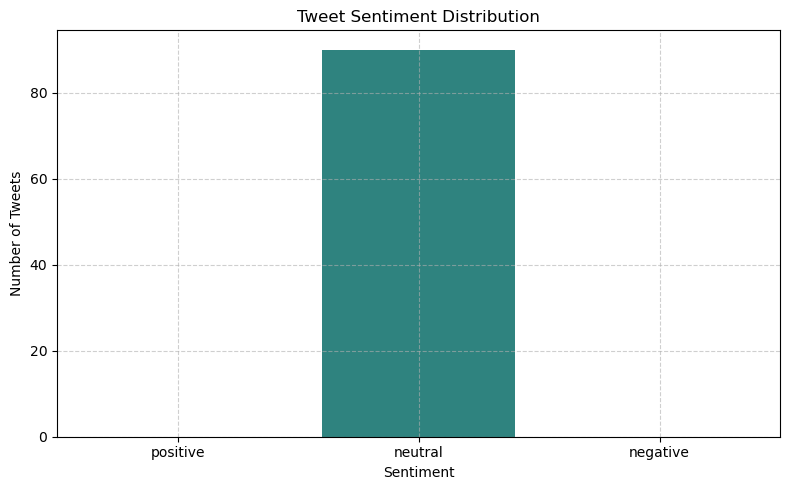

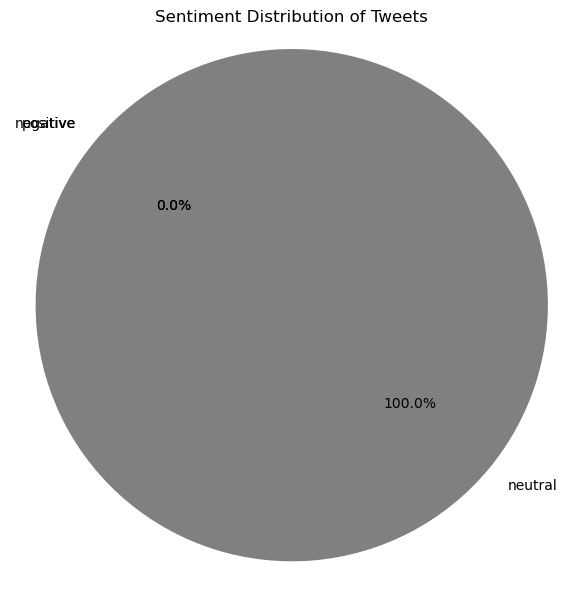

Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…


C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


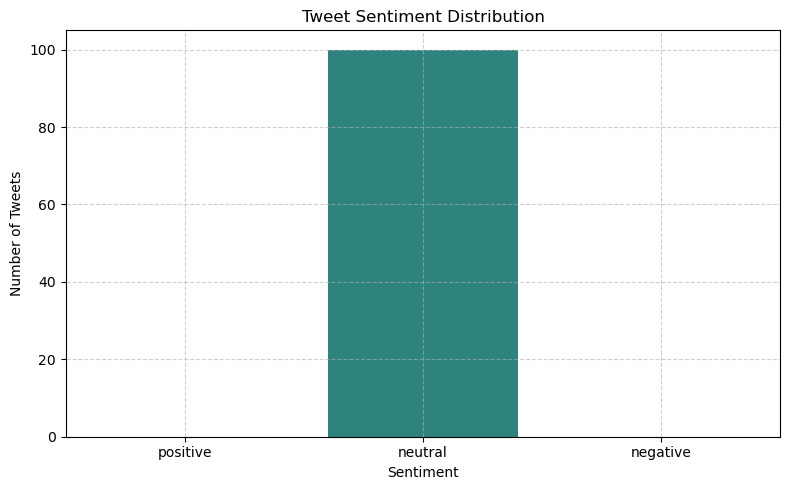

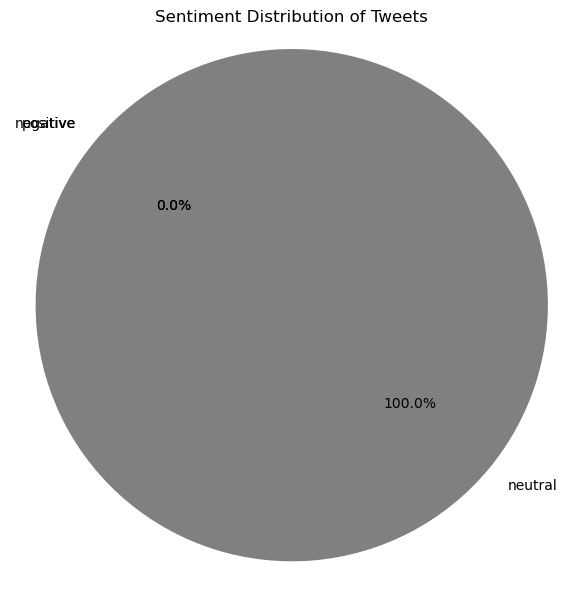

Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solic

C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


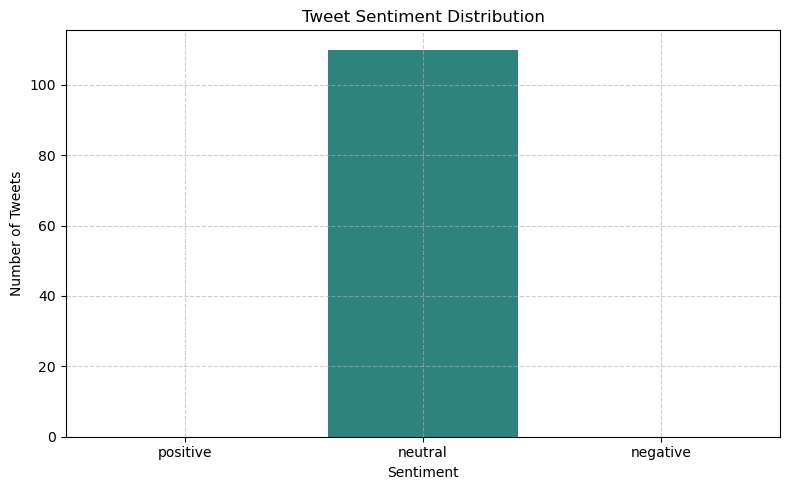

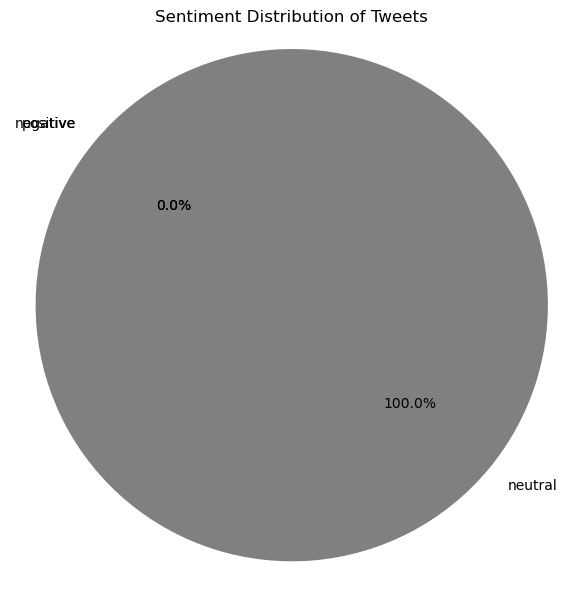

Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa


C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


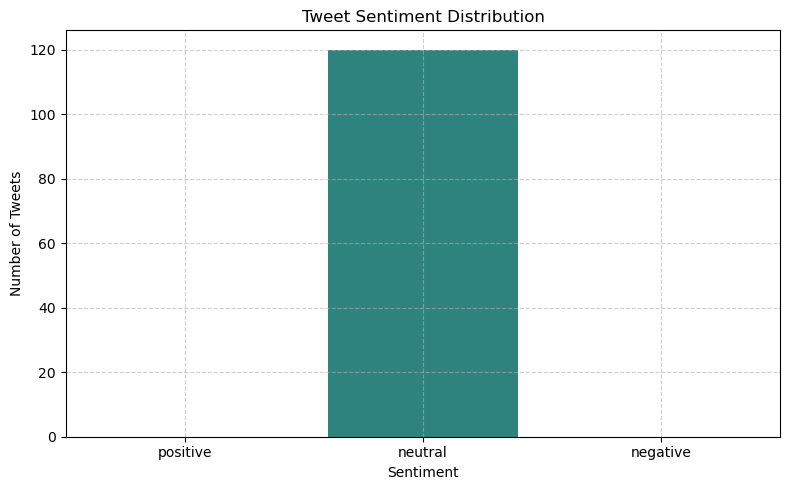

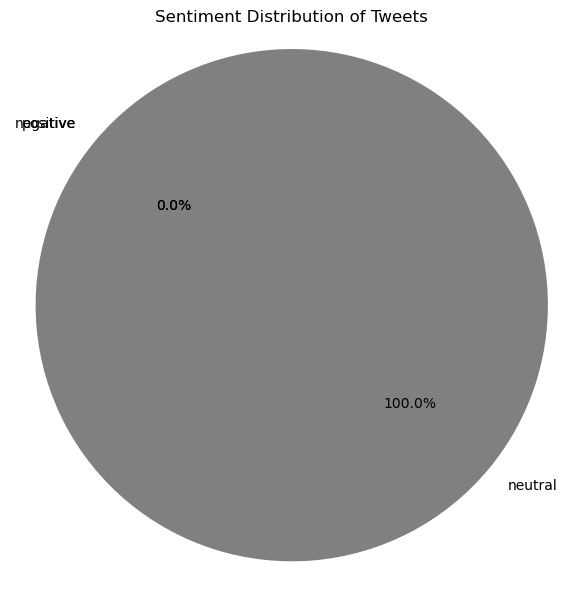

Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…


C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


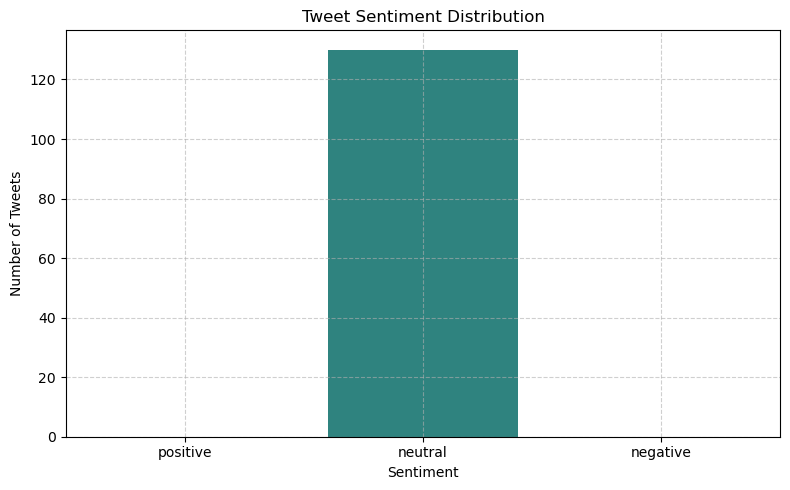

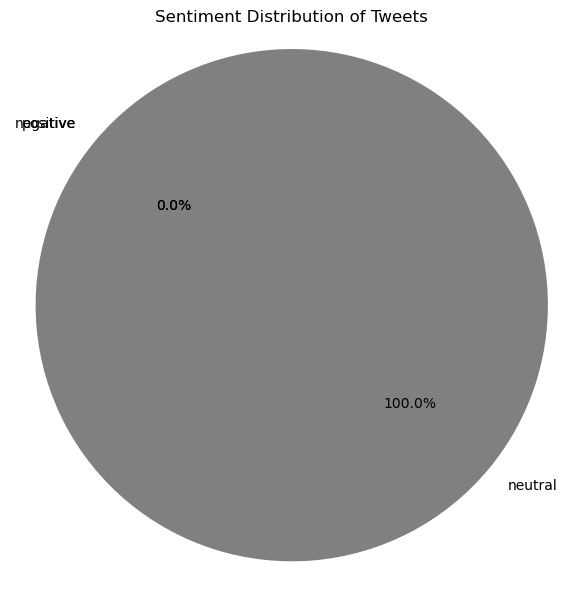

Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solic

C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


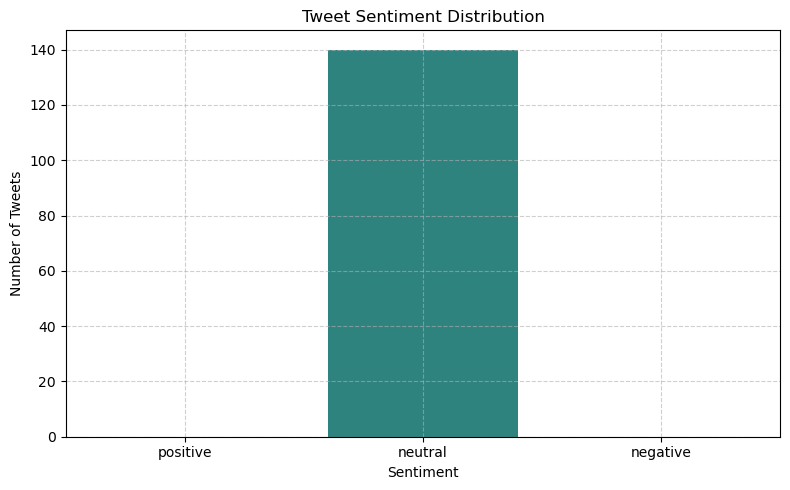

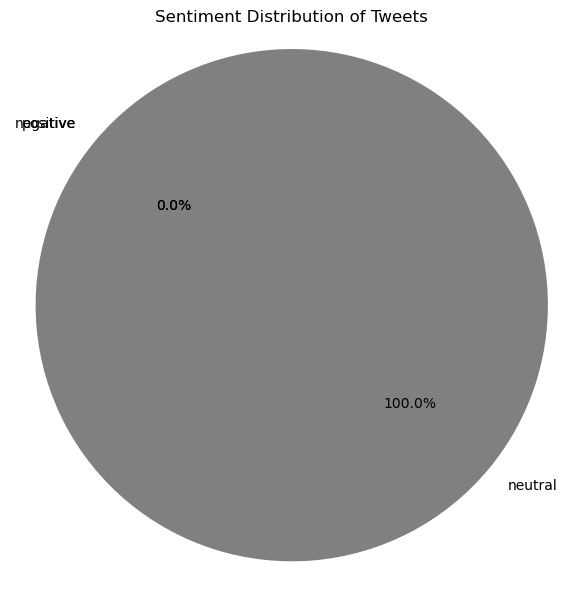

Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa


C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


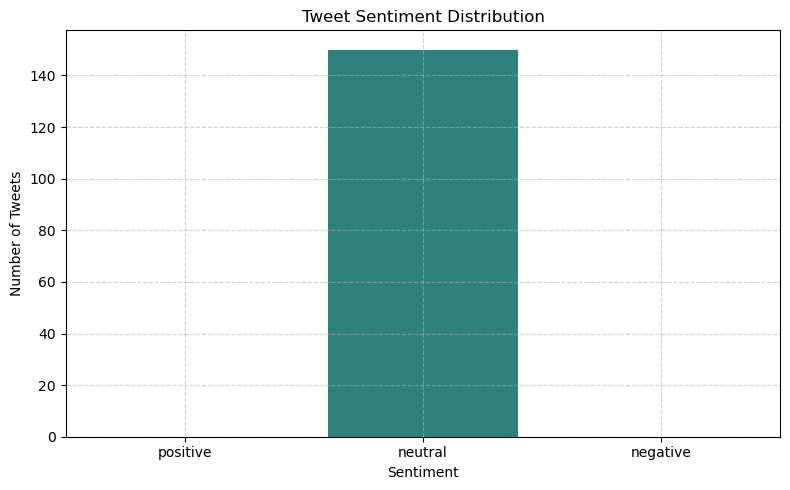

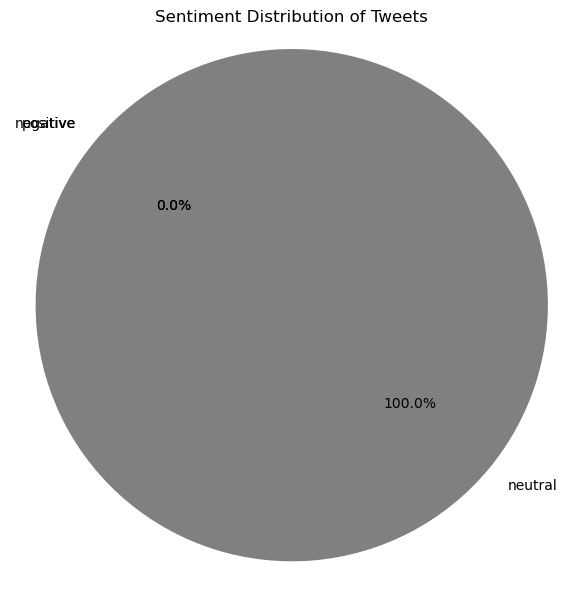

Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…


C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


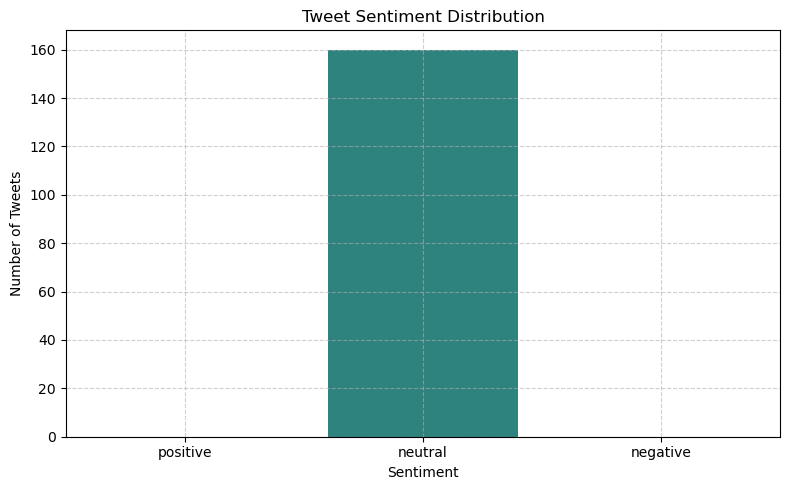

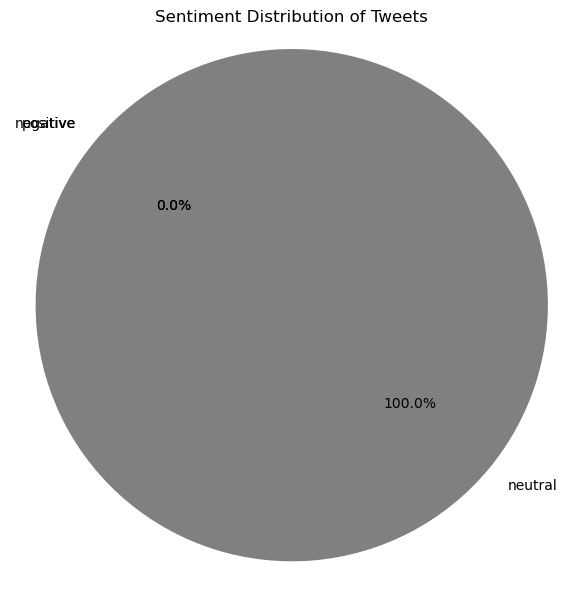

Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solic

C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


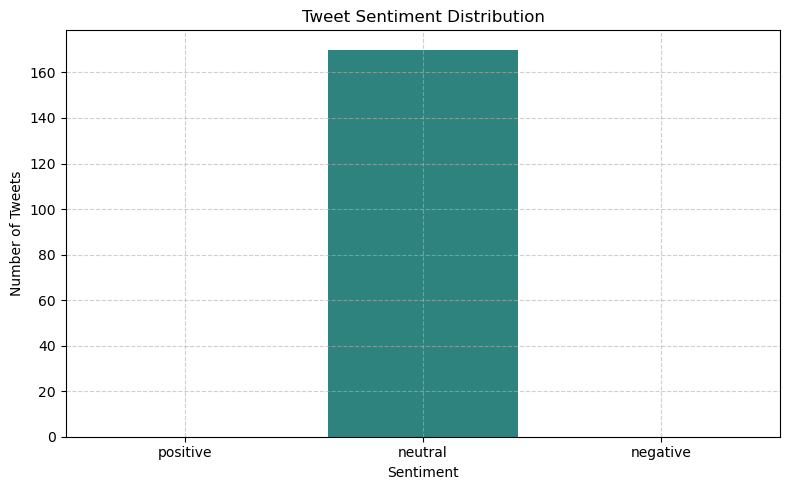

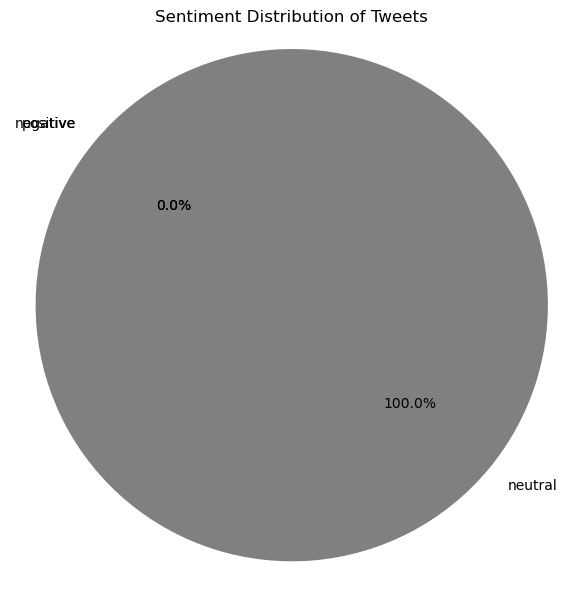

Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa


C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


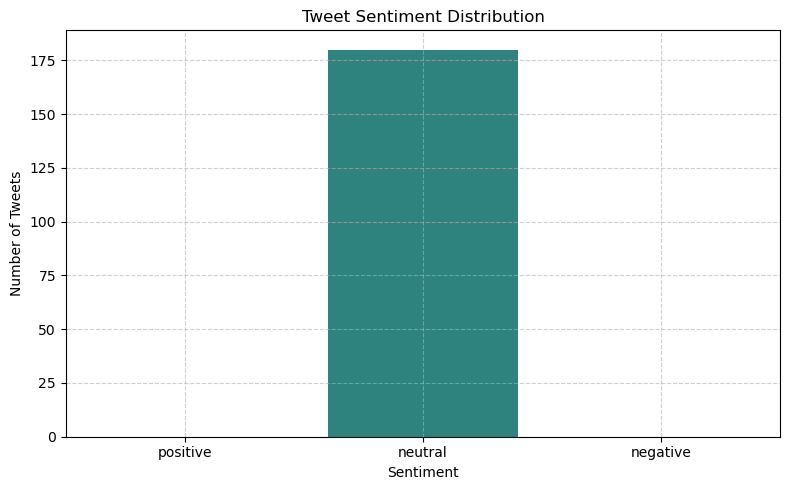

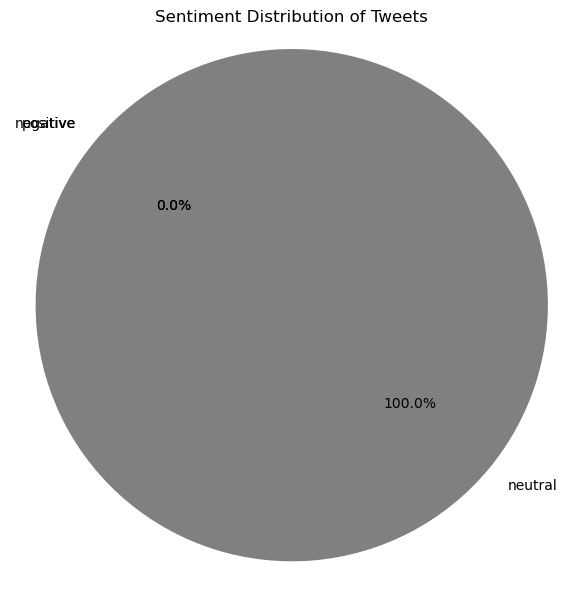

Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…


C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


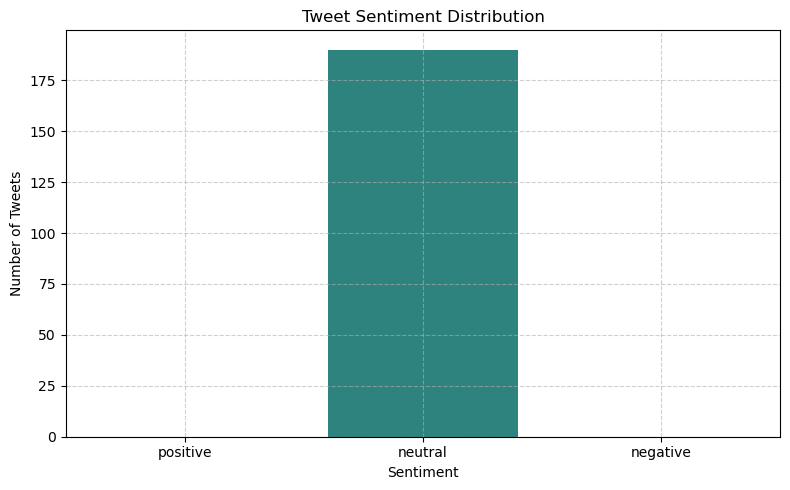

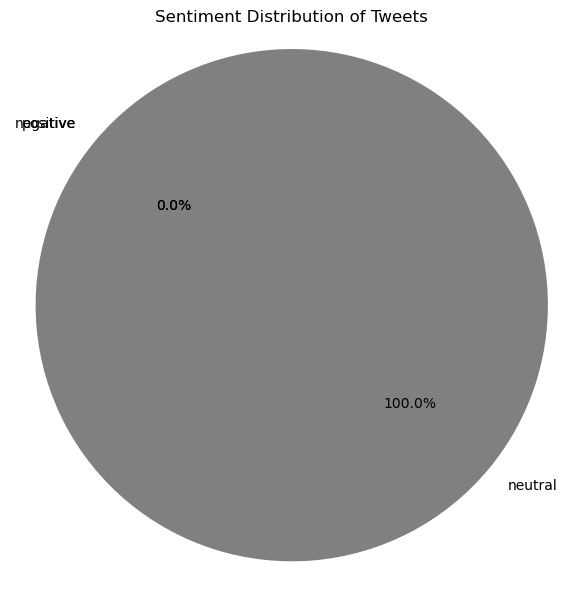

Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_

C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


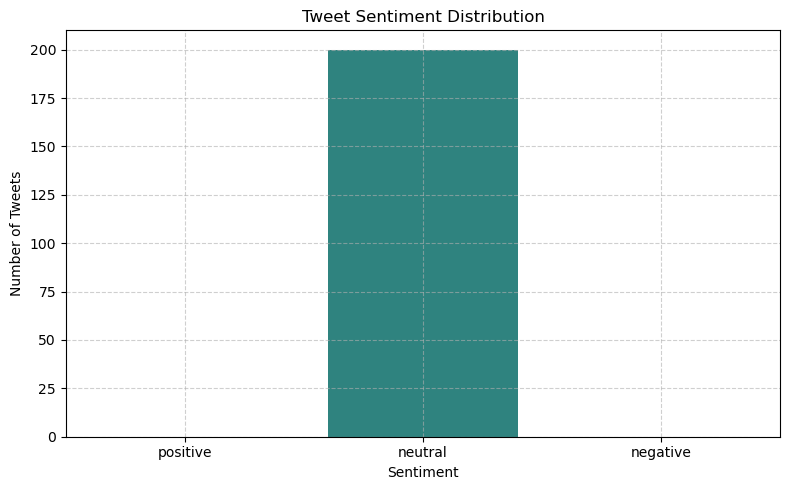

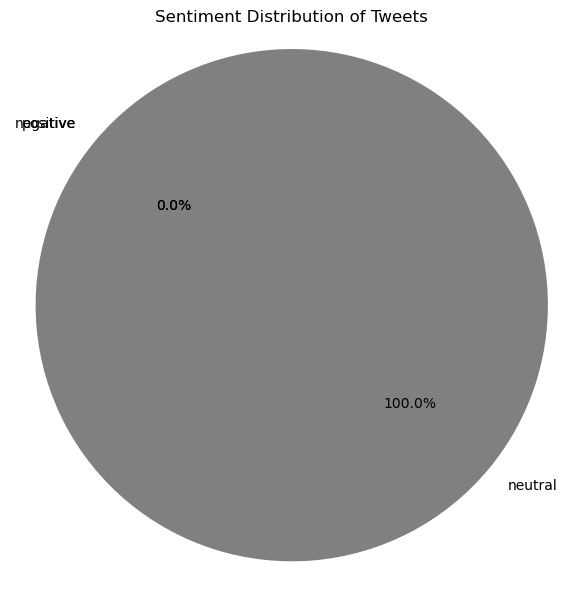

Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa


C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


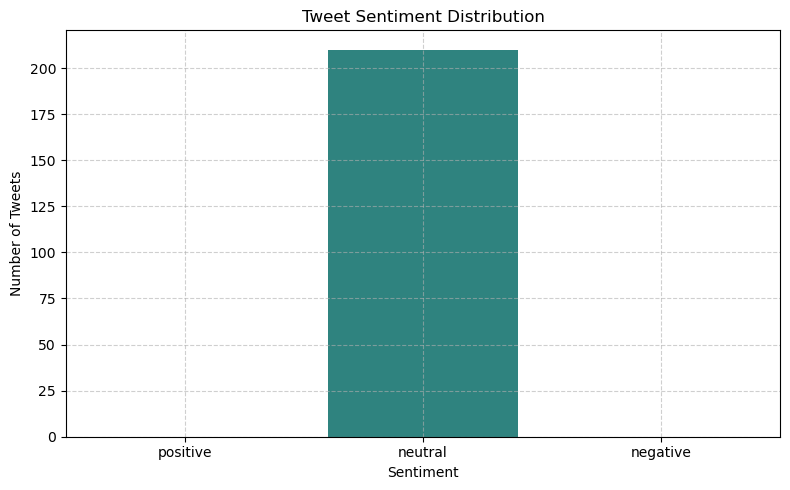

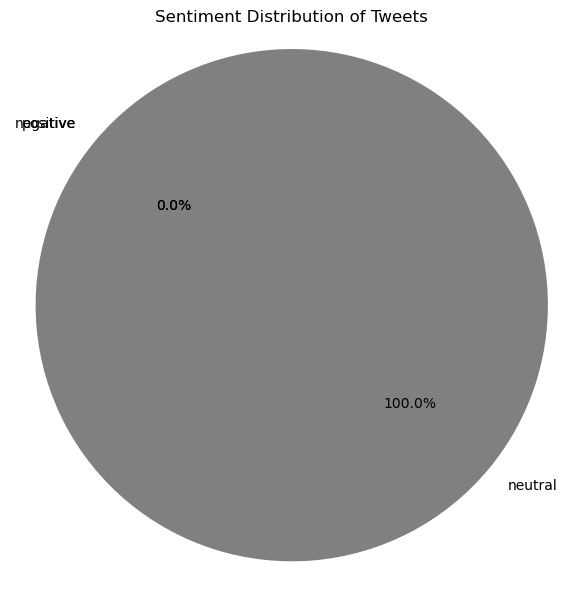

Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…


C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


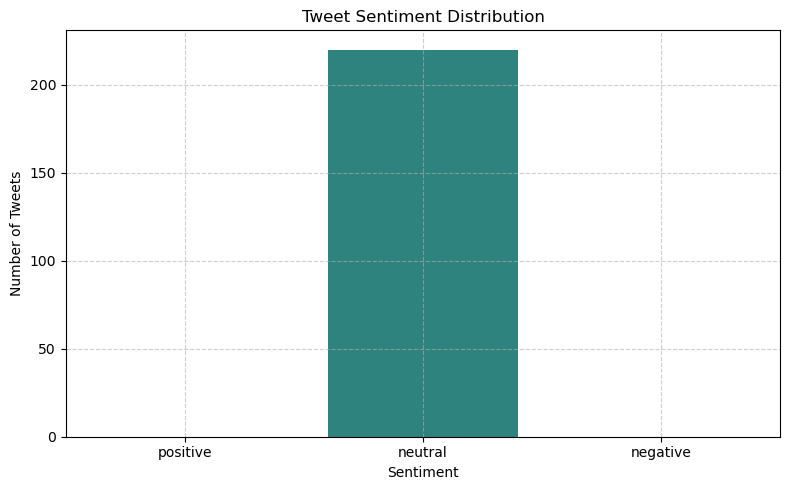

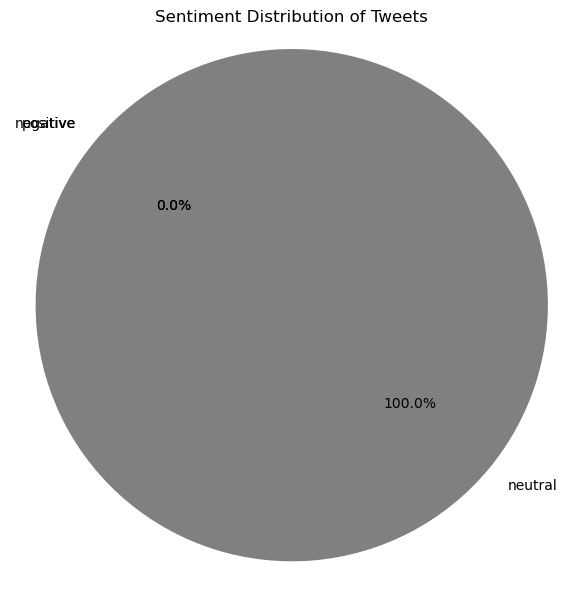

Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solic

C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


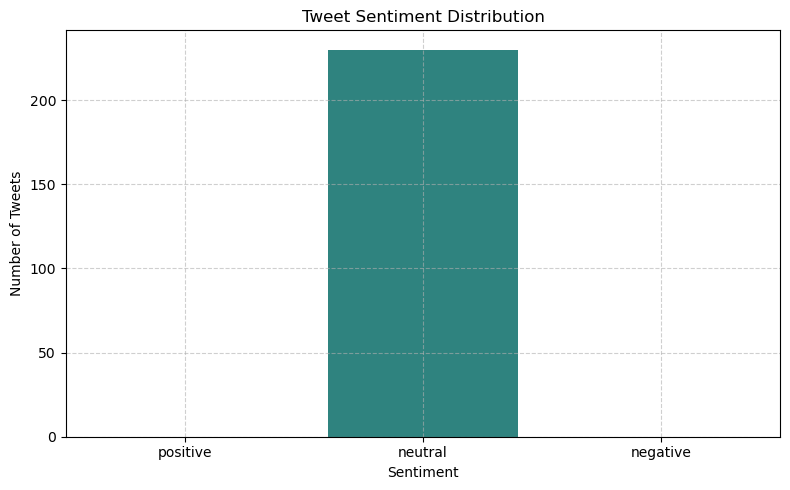

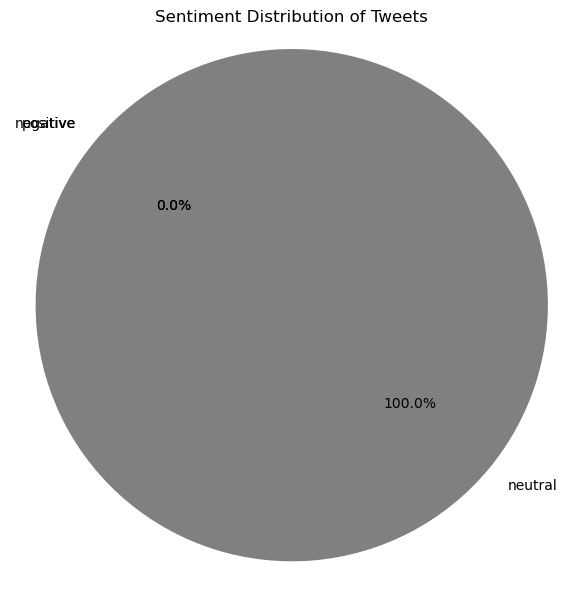

Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa


C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


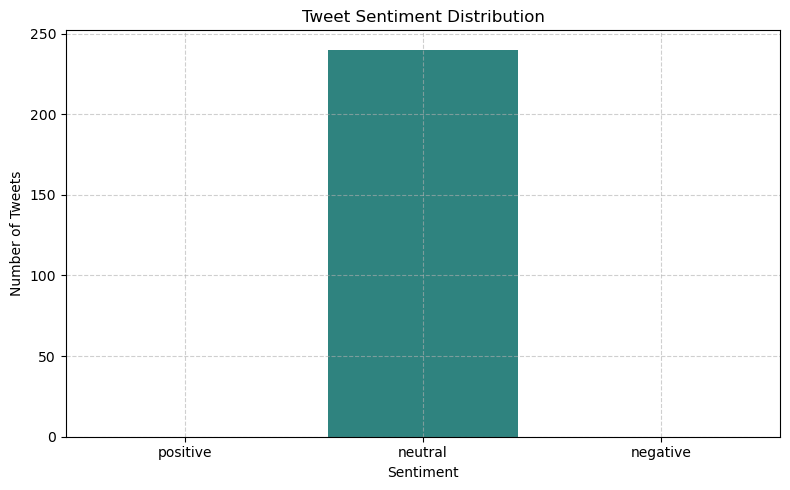

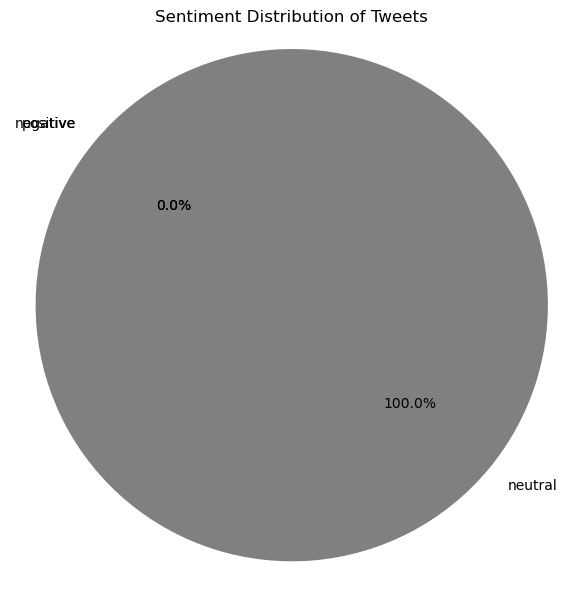

Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…


C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


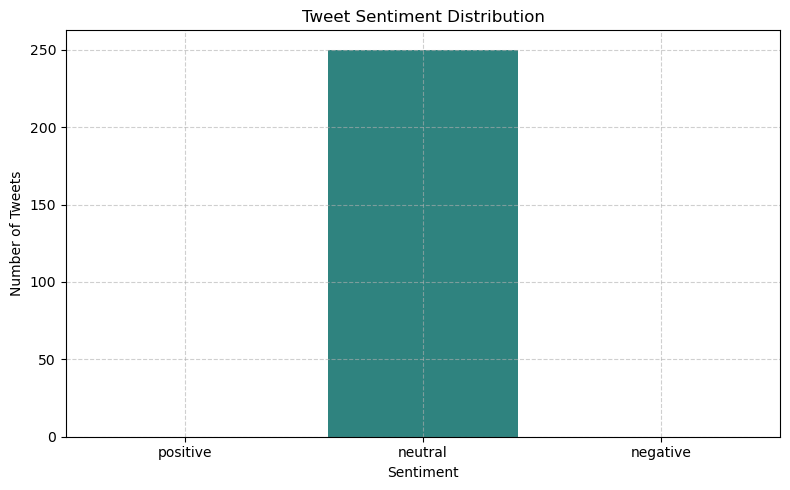

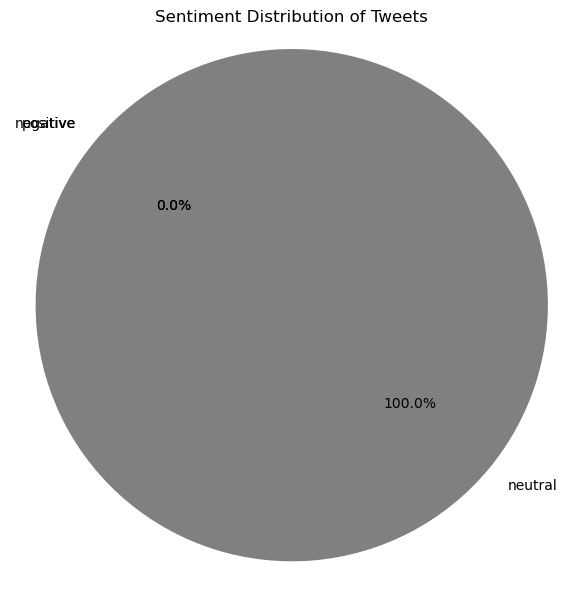

Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solic

C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


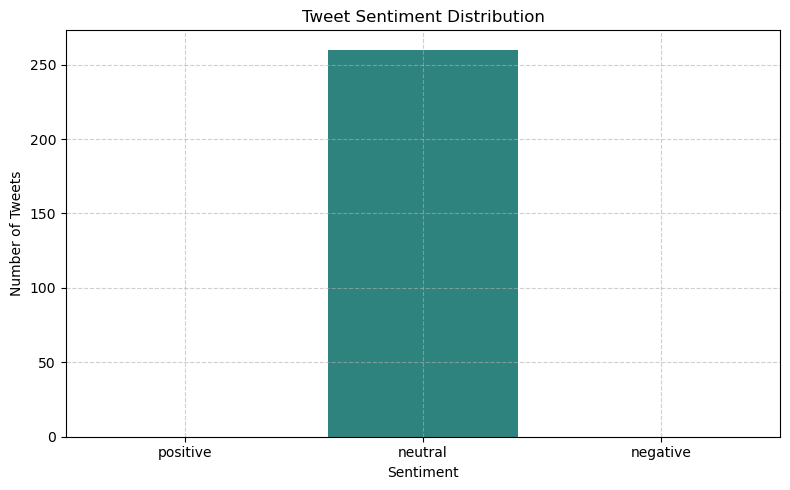

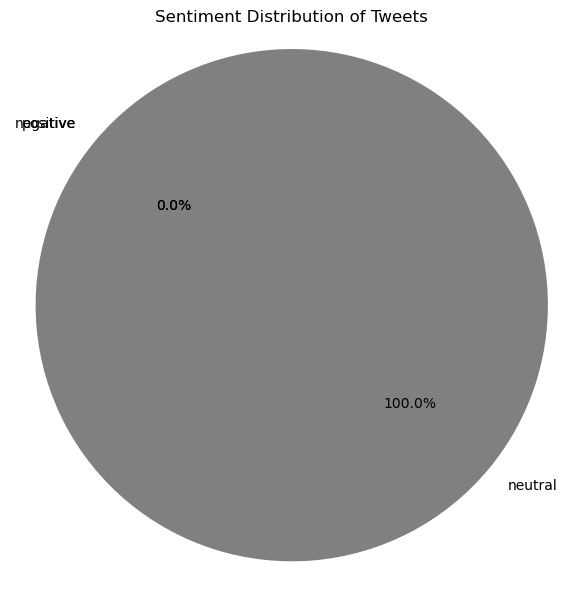

Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa


C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


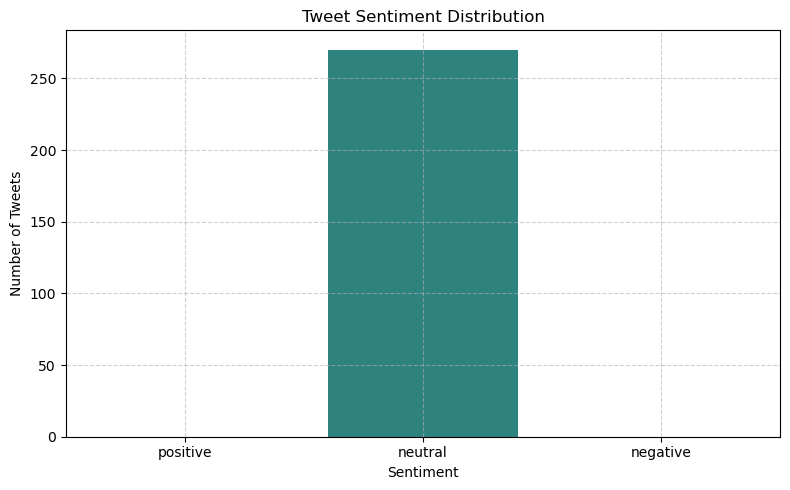

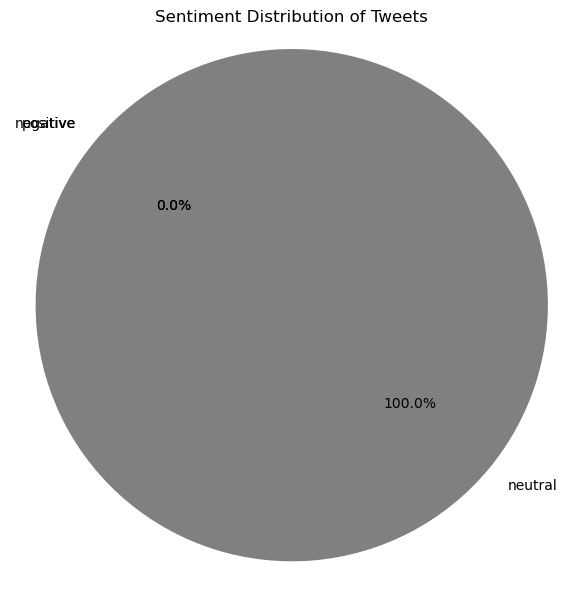

Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…


C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


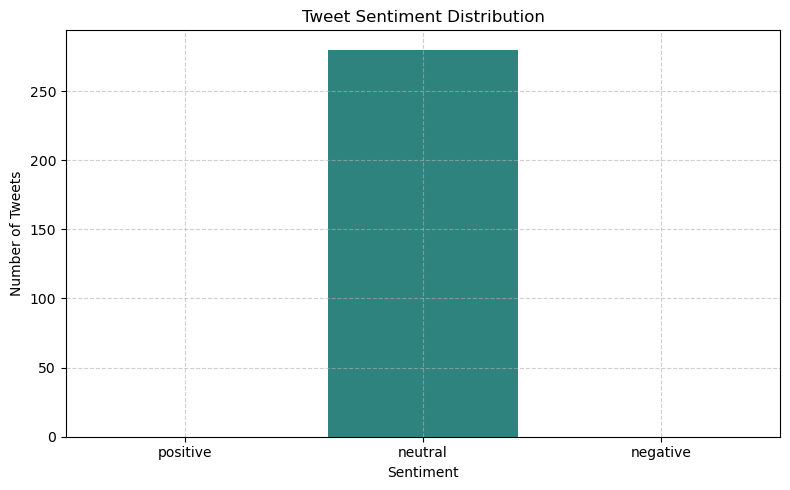

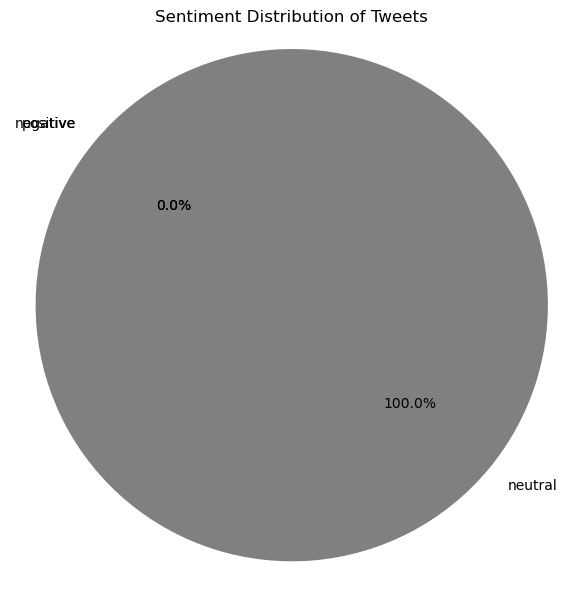

Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solic

C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


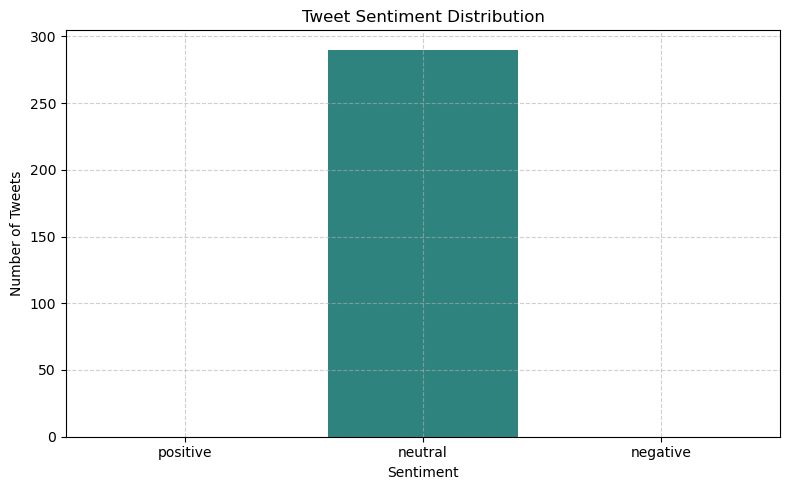

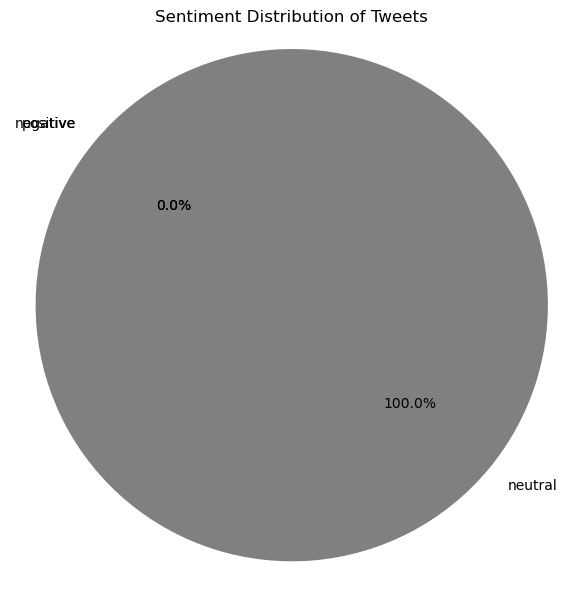

Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa


C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


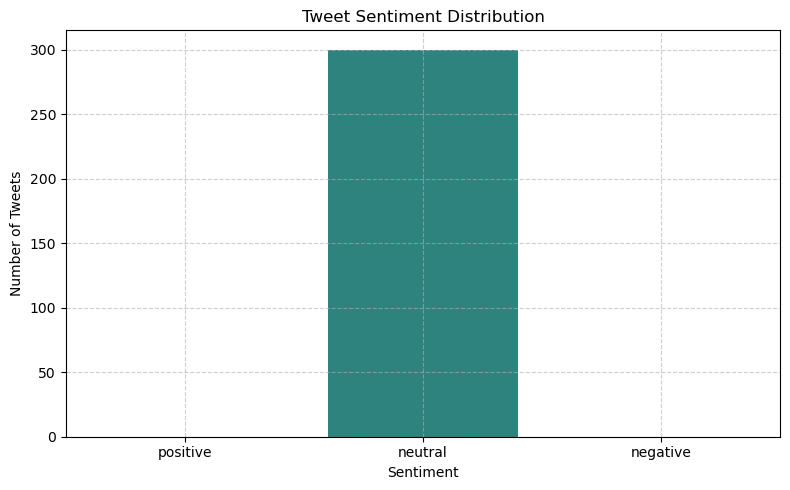

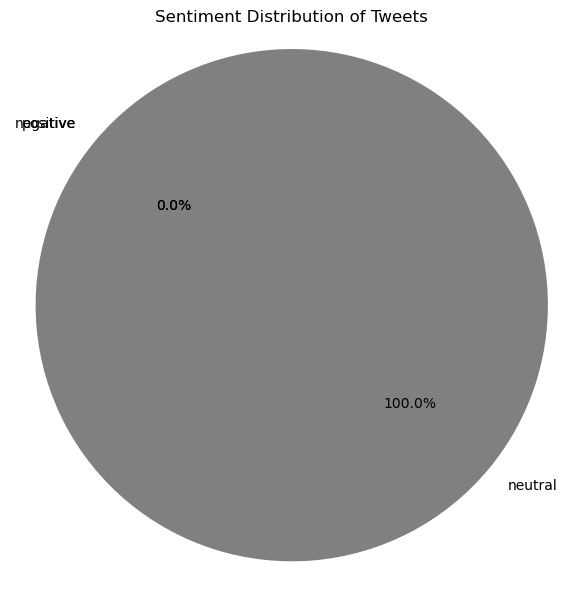

Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…


C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


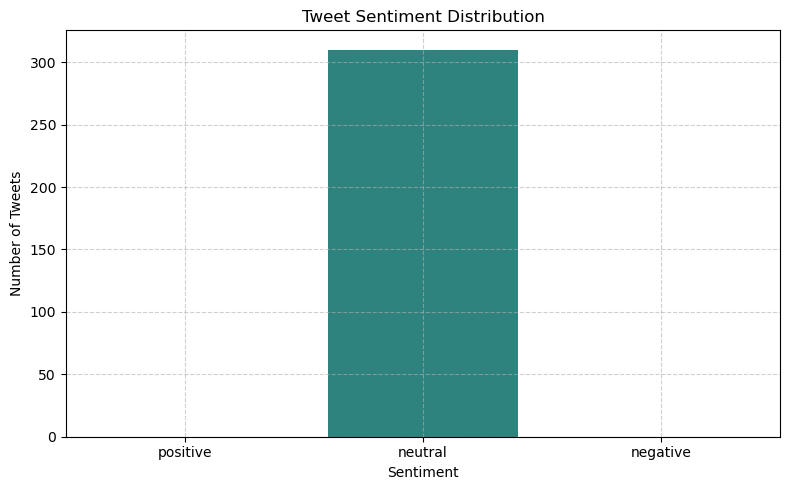

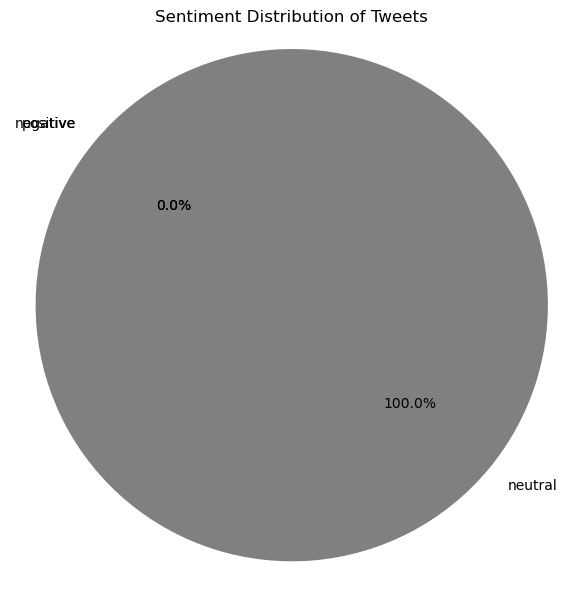

Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solic

C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


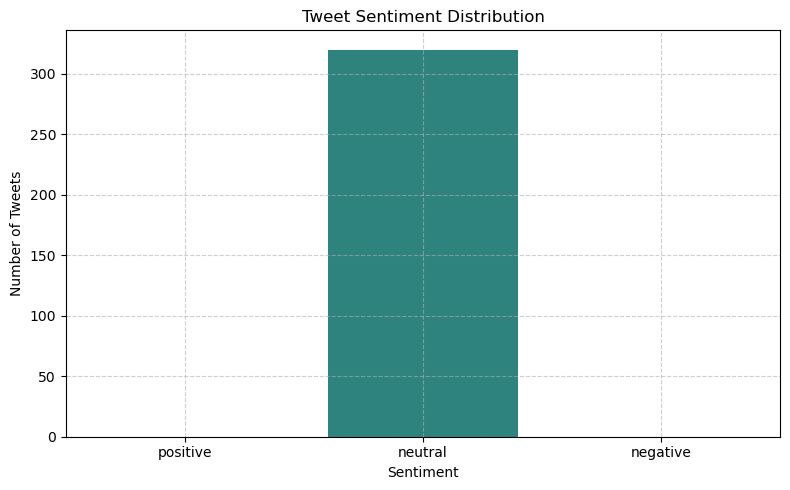

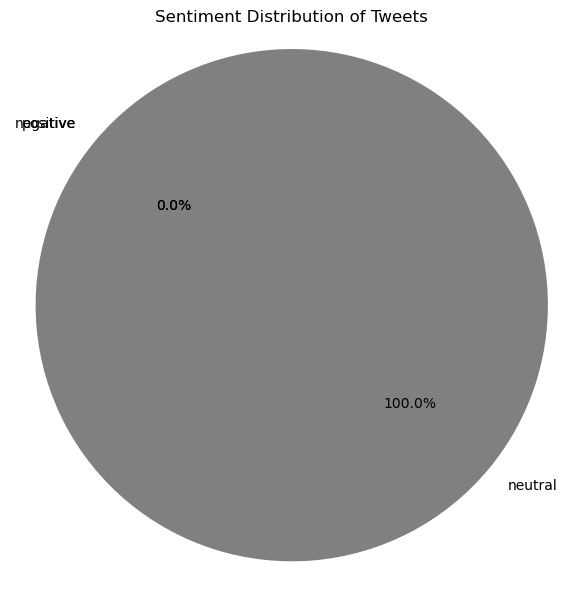

Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa


C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


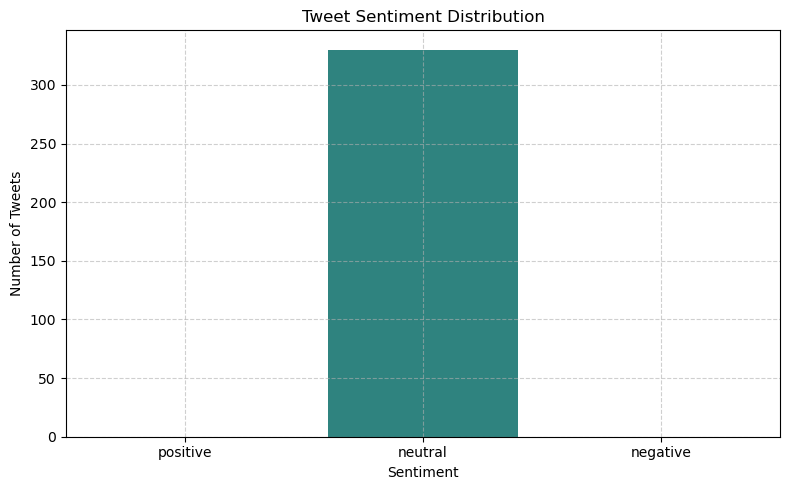

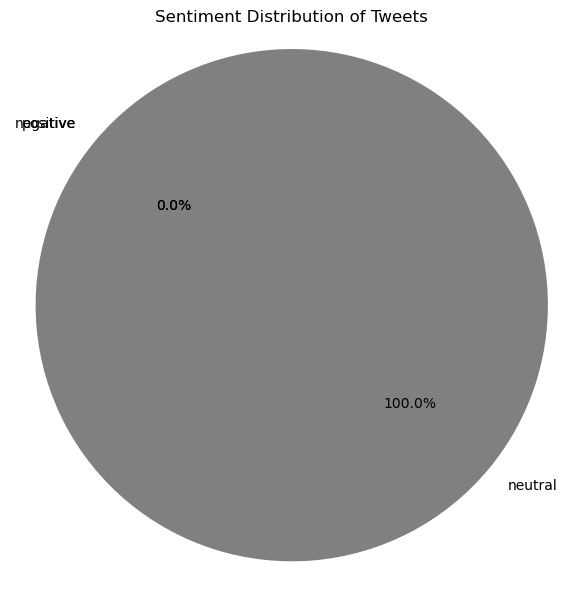

Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…


C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


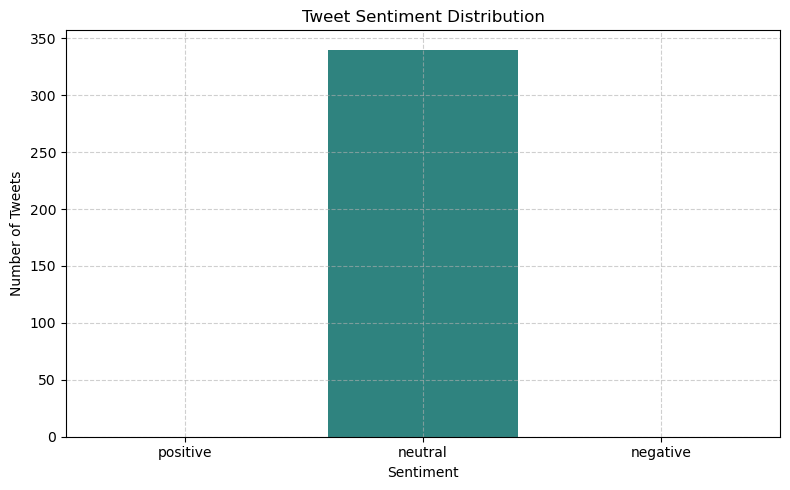

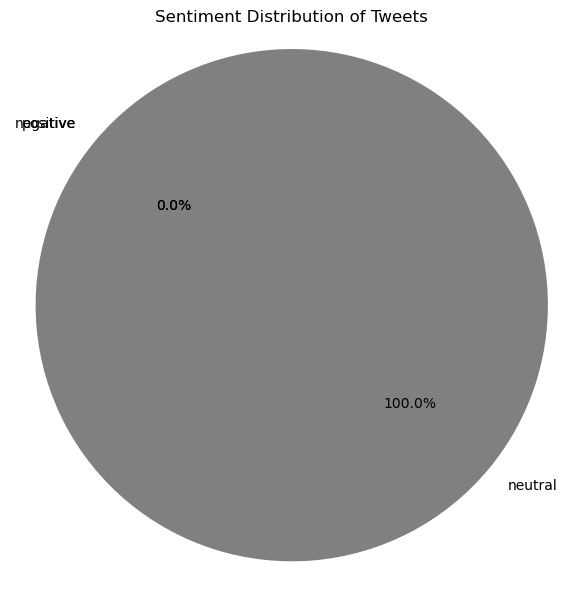

Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solic

C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


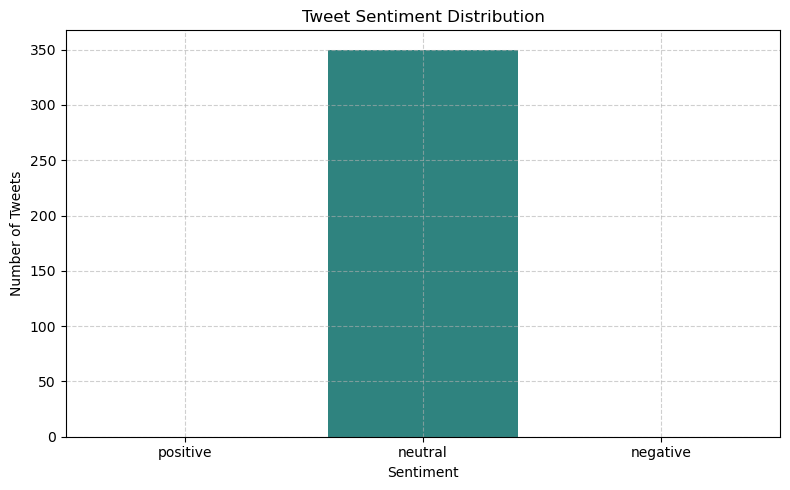

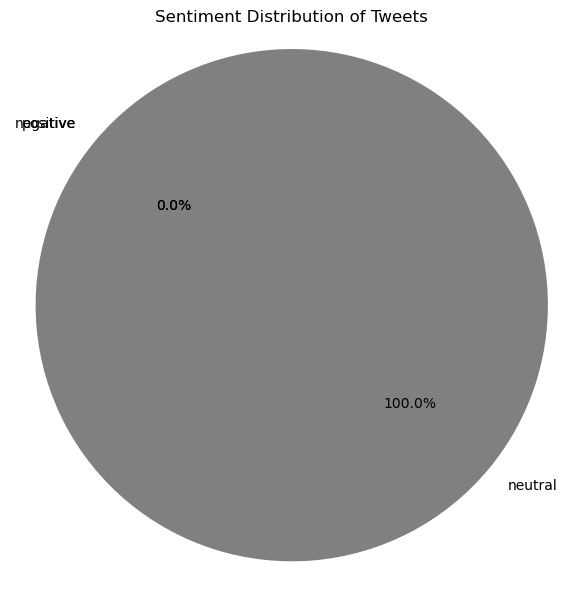

Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa


Exception ignored in: <function KafkaClient.__del__ at 0x000001CE26814680>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\Lib\site-packages\kafka\client_async.py", line 507, in __del__
    self._close()
  File "C:\Users\Admin\anaconda3\Lib\site-packages\kafka\client_async.py", line 484, in _close
    self._close_wakeup_socketpair()
  File "C:\Users\Admin\anaconda3\Lib\site-packages\kafka\client_async.py", line 297, in _close_wakeup_socketpair
    self._wake_r.close()
  File "C:\Users\Admin\anaconda3\Lib\socket.py", line 505, in close
    self._real_close()
  File "C:\Users\Admin\anaconda3\Lib\socket.py", line 499, in _real_close
    _ss.close(self)
KeyboardInterrupt: 
C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment

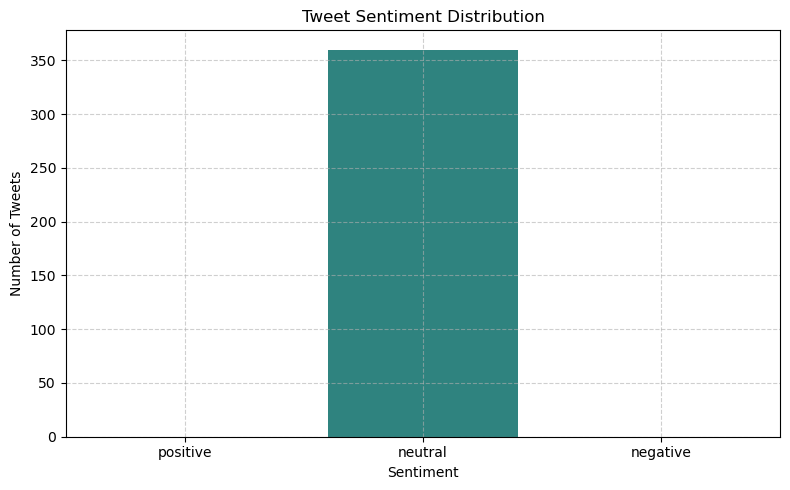

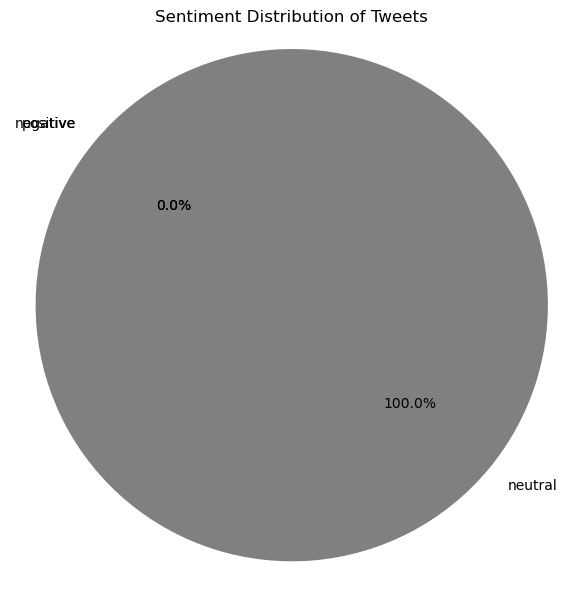

Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…


C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


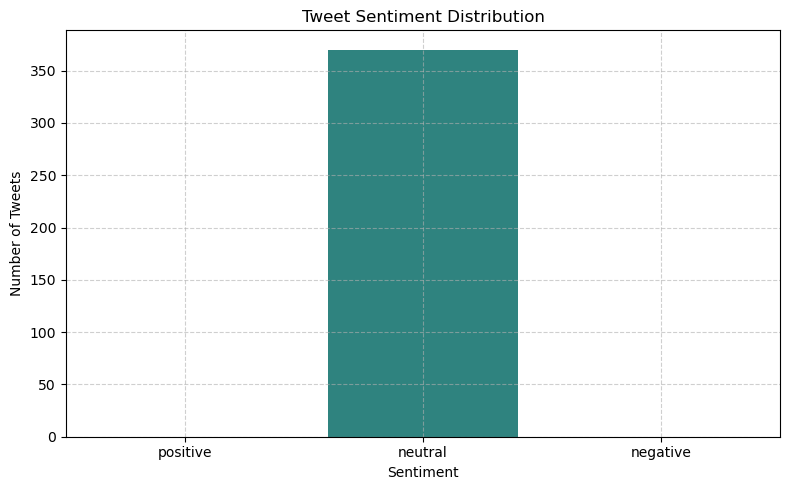

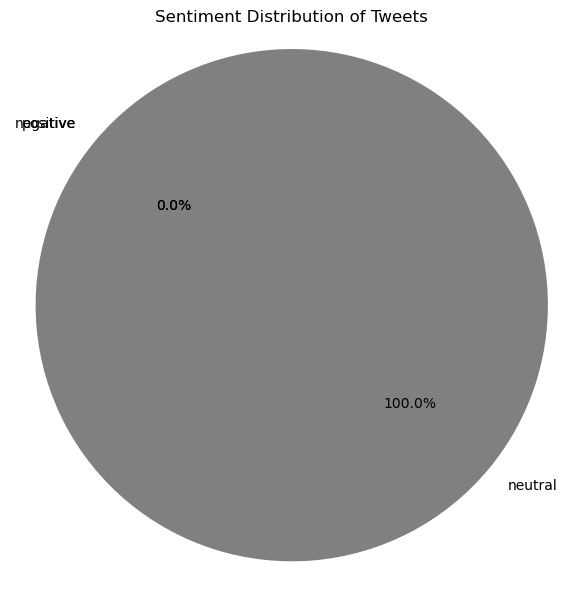

Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solic

C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


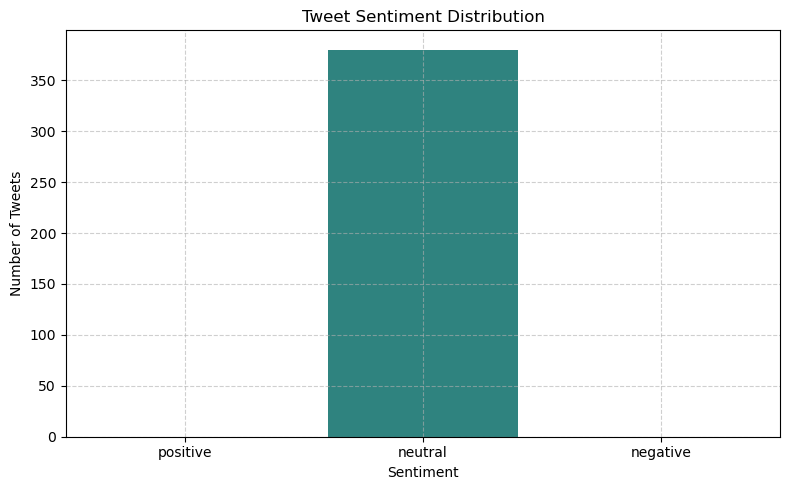

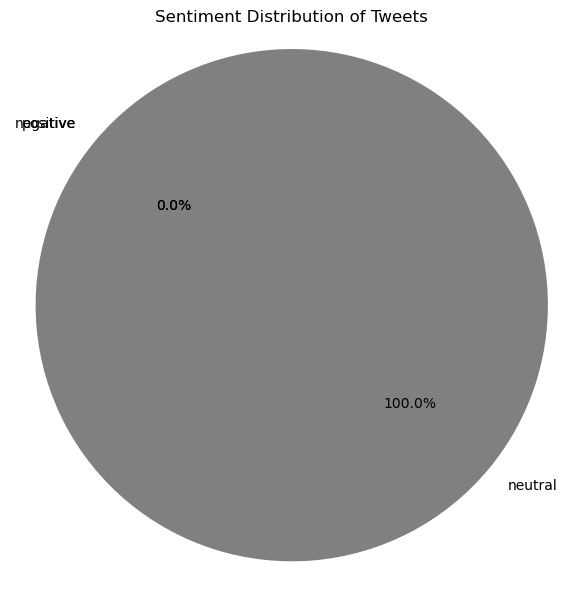

Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa


C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


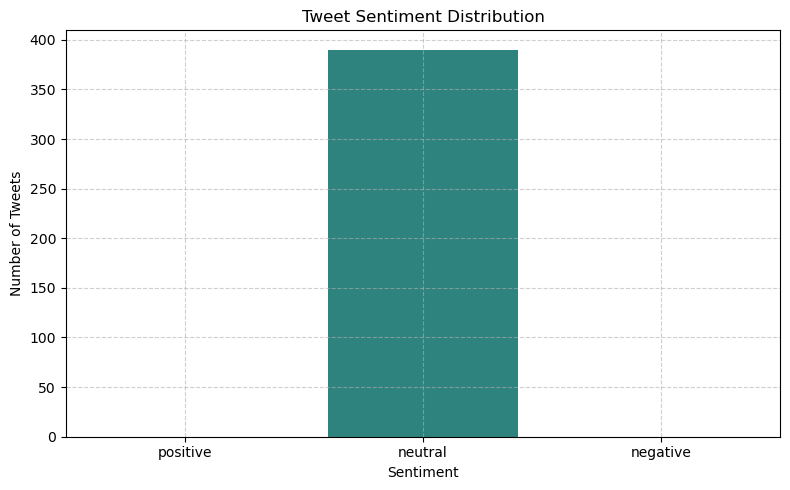

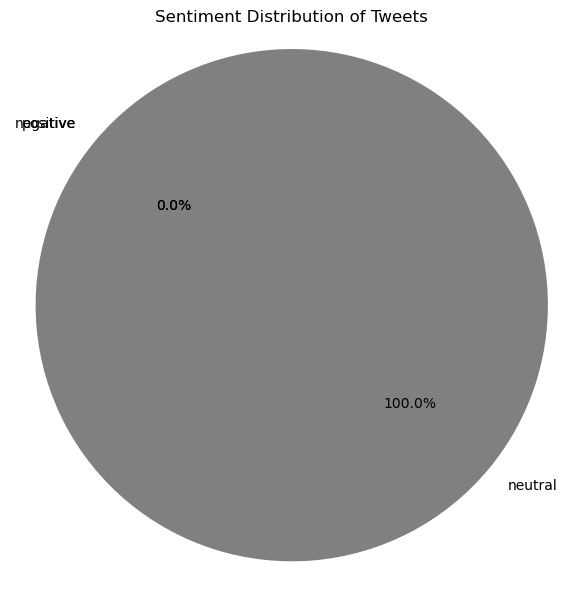

Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…


C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


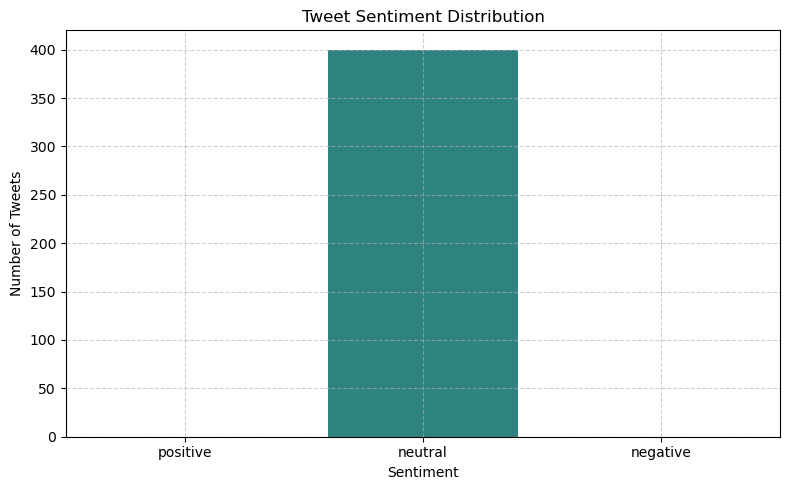

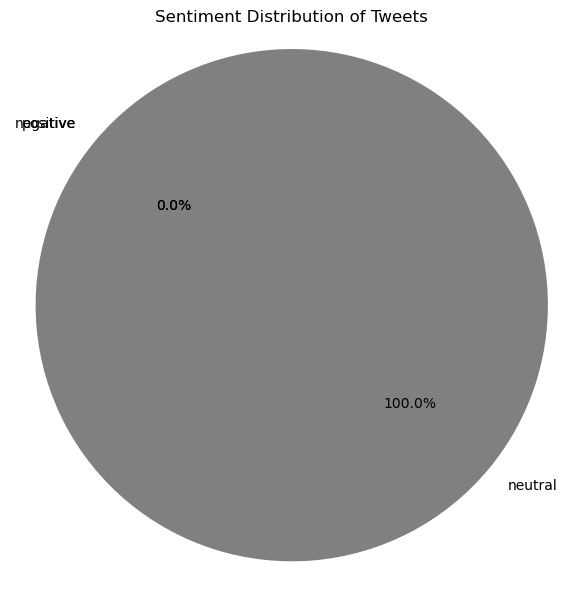

Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_

C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


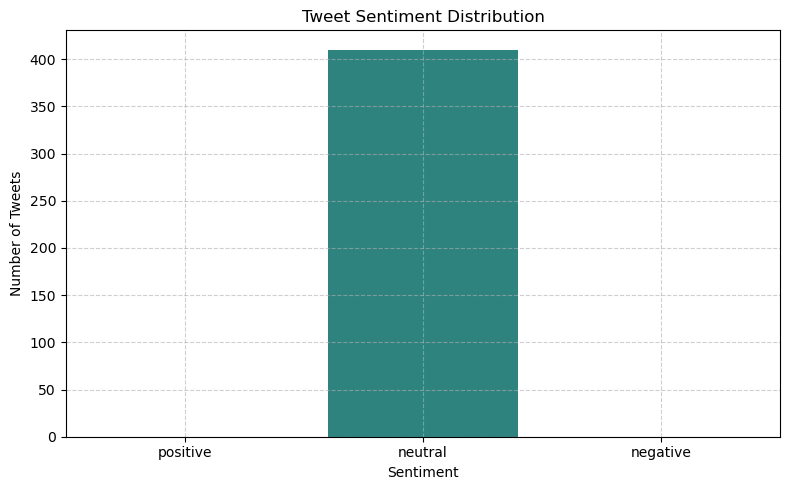

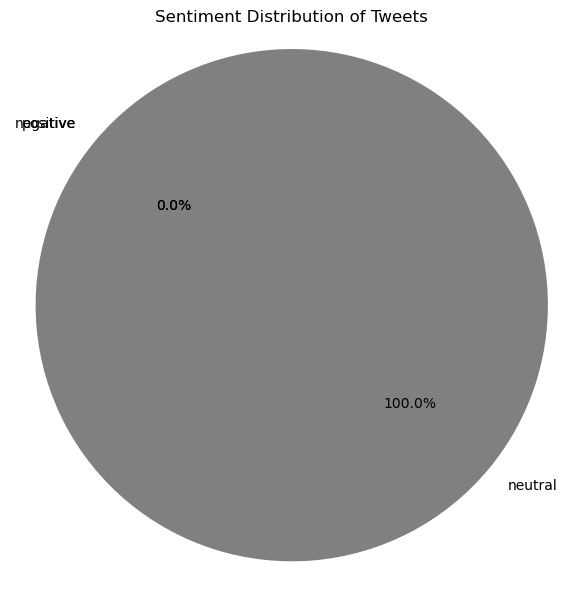

Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa


C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


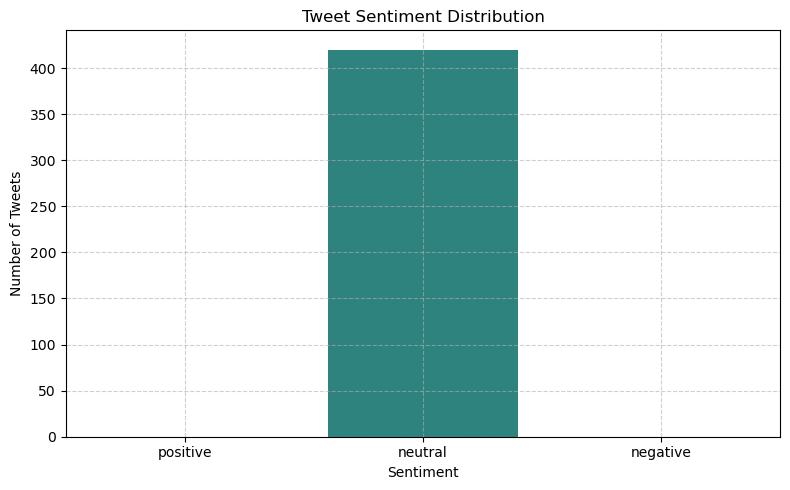

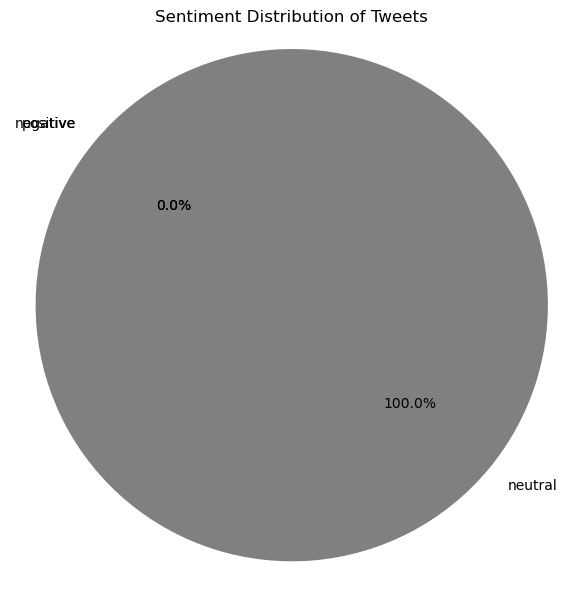

Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…


C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


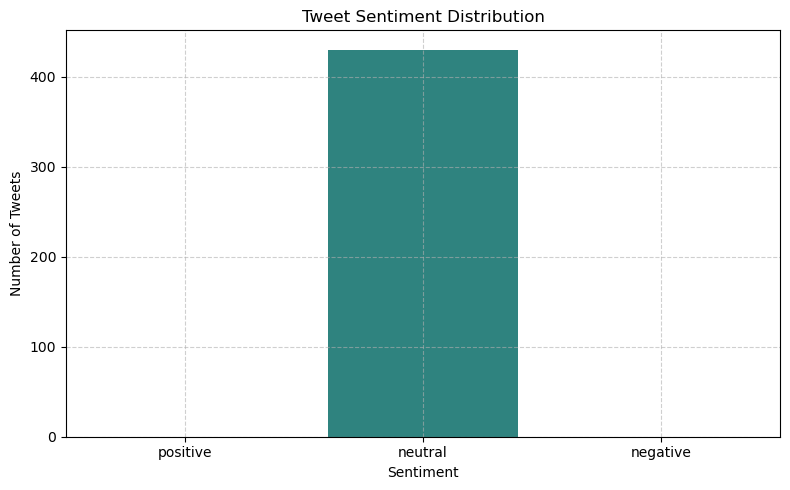

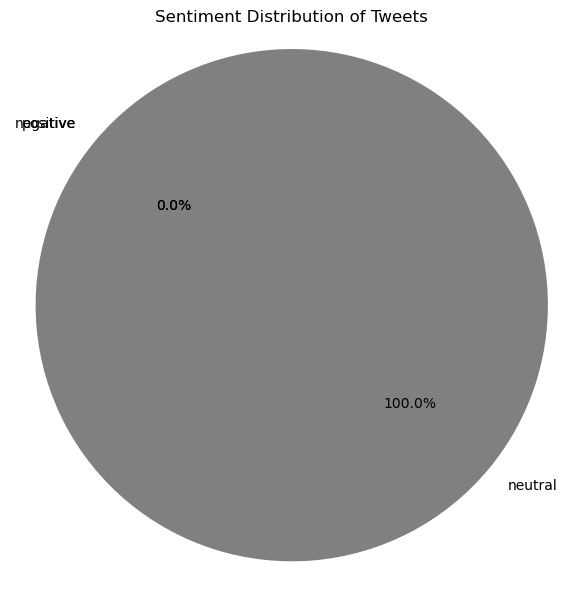

Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solic

C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


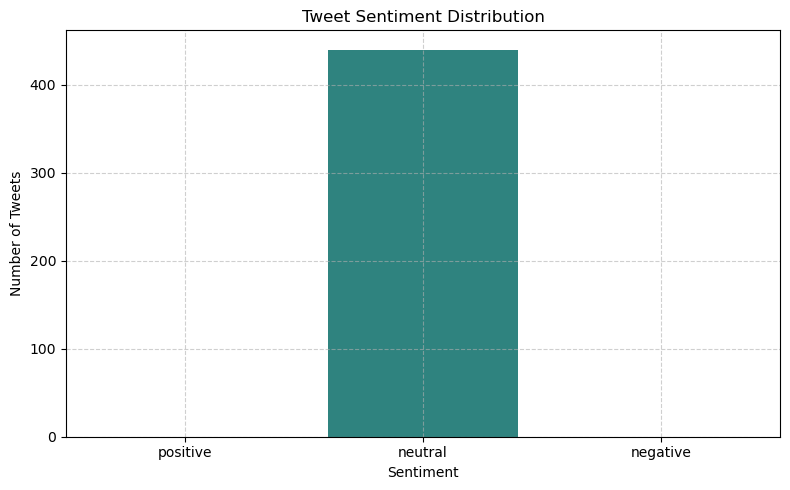

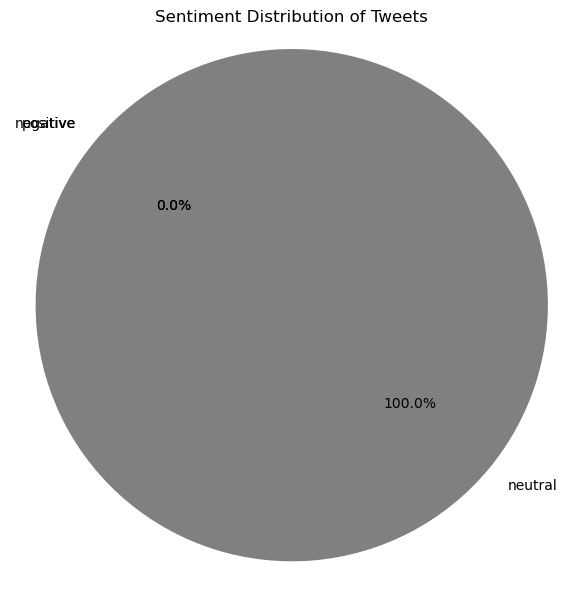

Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa


C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


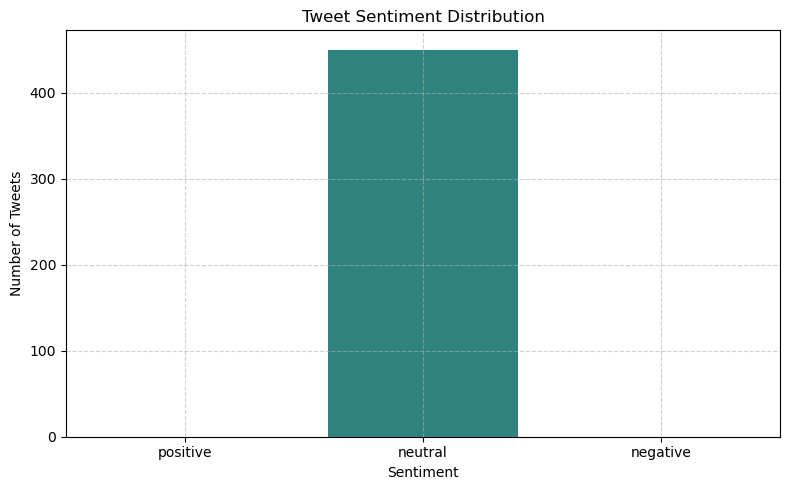

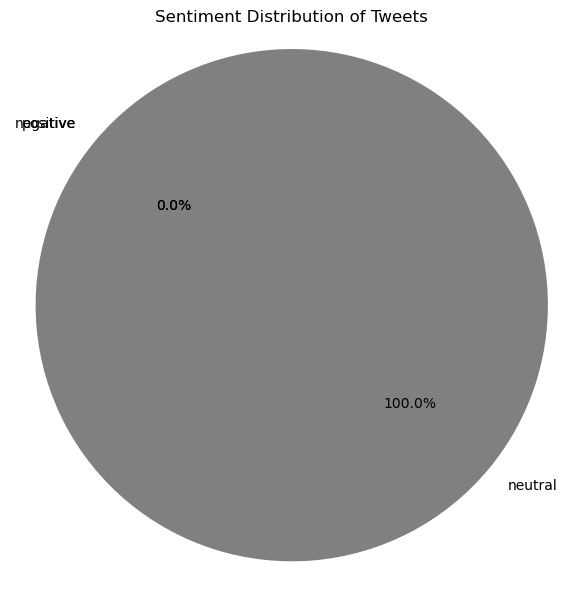

Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…


C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


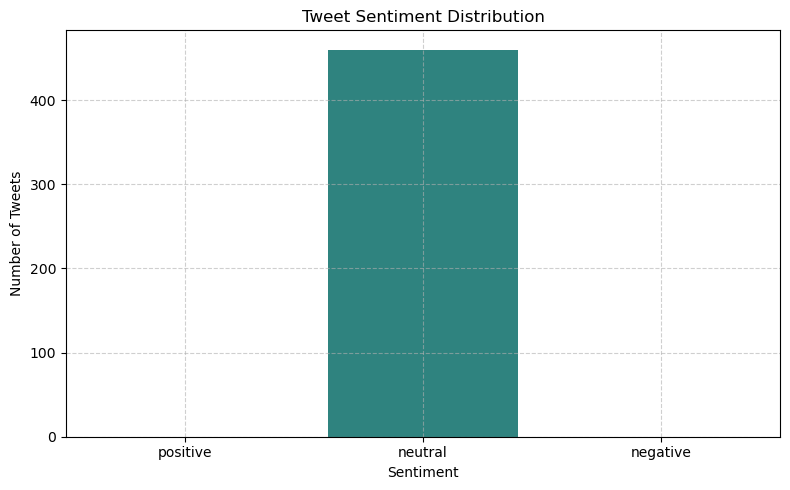

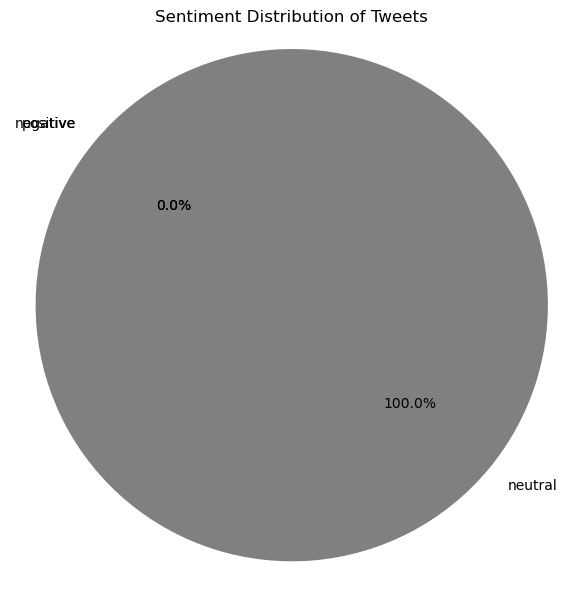

Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solicit money in the name of being a teacher in a school.  @Safaricom_Care @SafaricomPLC @DCI_Kenya
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @therealantoh: I worked for safaricom home fibre.

We were paid 10 bob per meter running the wifi cable.

500m would give us 5000 in a d…
Processing tweet: RT @ed_gera8: Nani hufanya kazi safaricom hapa
Processing tweet: RT @Iam_Tilo: Between Royal Media Services and Safaricom which one is richer?
Processing tweet: This number (0702452685)
is registered as 
Mary M'guantai &amp; is trying to solic

C:\Users\Admin\AppData\Local\Temp\ipykernel_12368\3425856412.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


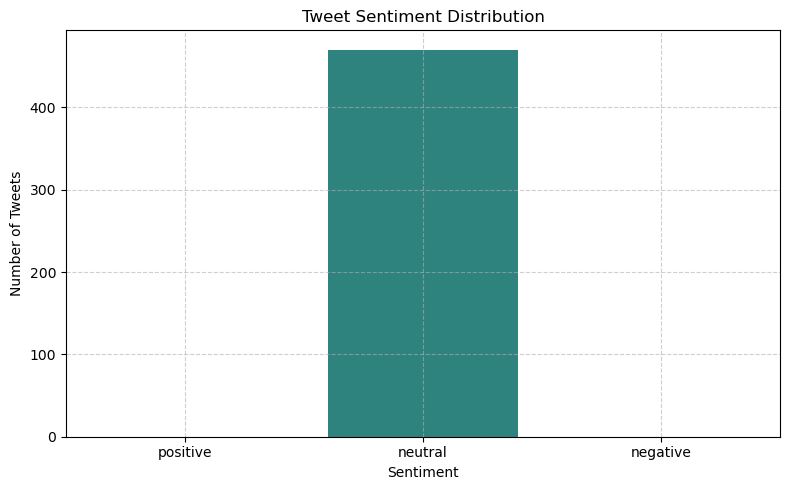

Stopped listening.


In [3]:
from kafka import KafkaConsumer
import json
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set up transformer model
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Initialize Kafka consumer
consumer = KafkaConsumer(
    'safaricom_tweets',
    bootstrap_servers='localhost:9092',
    auto_offset_reset='latest',
    enable_auto_commit=True,
    group_id='tweet-group',
    value_deserializer=lambda x: json.loads(x.decode('utf-8'))
)

# Function for sentiment analysis
def analyze_sentiment(tweet):
    inputs = tokenizer(tweet, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        logits = model(**inputs).logits
    probs = torch.nn.functional.softmax(logits, dim=1)
    label_index = torch.argmax(probs, dim=1).item()
    labels = ["negative", "neutral", "positive"]
    return labels[label_index], probs[0][label_index].item()

# Store results
data = []
counter = 0

print("Listening for new tweets...\n")
try:
    for message in consumer:
        tweet = message.value
        tweet_id = tweet.get('tweet_id')
        tweet_text = tweet.get('tweet_text')
        print(f"Processing tweet: {tweet_text}")

        sentiment, confidence = analyze_sentiment(tweet_text)
        timestamp = datetime.now()

        data.append({
            "tweet_id": tweet_id,
            "tweet_text": tweet_text,
            "sentiment_label": sentiment,
            "confidence": confidence,
            "timestamp": timestamp
        })

        counter += 1

        # Only visualize after every 10 tweets
        if counter % 10 == 0:
            df = pd.DataFrame(data)

            # Bar Chart
            sentiment_counts = df['sentiment_label'].value_counts().reindex(["positive", "neutral", "negative"], fill_value=0)
            plt.figure(figsize=(8, 5))
            sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
            plt.title("Tweet Sentiment Distribution")
            plt.xlabel("Sentiment")
            plt.ylabel("Number of Tweets")
            plt.tight_layout()
            plt.grid(True, linestyle='--', alpha=0.6)
            plt.show(block=False)
            plt.pause(1)
            plt.close()

            # Pie Chart
            plt.figure(figsize=(6, 6))
            colors = ['green', 'gray', 'red']
            plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
            plt.title("Sentiment Distribution of Tweets")
            plt.axis('equal')
            plt.tight_layout()
            plt.show(block=False)
            plt.pause(1)
            plt.close()

except KeyboardInterrupt:
    print("Stopped listening.")


🚀 Kafka tweet processor started... Only new tweets will be read.

🕒 Polling for new messages...
📥 Received tweet: [TECH] After a Year with Airtel 5G Router, I’m Ready to Try Safaricom 5G Router but for One Major Reason: There was a time not too long ago when I swore Id never go back to Airtel. Then, in 2024, I ate my .. https://t.co/TZdtcirdTn via @TechishKenya


C:\Users\Admin\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


📥 Received tweet: @Safaricom_Care Please check DM
📥 Received tweet: @SankeiSaitoti @SafaricomPLC @AIRTEL_KE Soon I will be moving to Airtel,,,, safaricom has become more expensive mostly when you buy Certain offers frequently they charge twice
📥 Received tweet: How do I Buy Airtime for All Networks Without Transaction Charges?

Buy Airtel, Safaricom, Telkom, Equitel and Faiba Airtime from M-pesa

1. Go to the M-pesa Menu.
2. Select Pay Bill.
3. Enter Business No. 4166283
4. Enter Account No. Phone Number (Where XXX is your Mobile https://t.co/CIMrv1CMte
📥 Received tweet: RT @georgediano: If you transact Ksh 105 via M-Pesa, Safaricom deducts a total of Ksh 36 in charges, a transfer fee of Ksh 7 and a withdraw…
📥 Received tweet: How do I Buy Airtime for All Networks Without Transaction Charges?

Buy Airtel, Safaricom, Telkom, Equitel and Faiba Airtime from M-pesa

1. Go to the M-pesa Menu.
2. Select Pay Bill.
3. Enter Business No. 4166283
4. Enter Account No. Phone Number (Where XXX is y

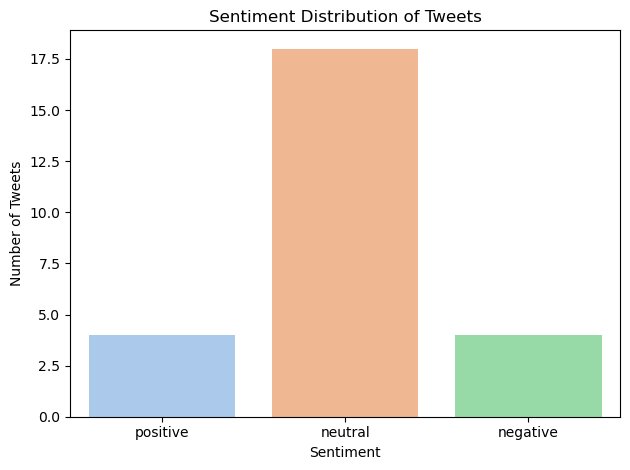


🔁 Waiting for next batch...


🕒 Polling for new messages...
✅ Collected 0 tweets in the last 30 seconds.
❌ No new tweets this round.

🔁 Waiting for next batch...


🕒 Polling for new messages...
✅ Collected 0 tweets in the last 30 seconds.
❌ No new tweets this round.

🔁 Waiting for next batch...


🕒 Polling for new messages...
✅ Collected 0 tweets in the last 30 seconds.
❌ No new tweets this round.

🔁 Waiting for next batch...


🕒 Polling for new messages...


KeyboardInterrupt: 

In [6]:
from kafka import KafkaConsumer
import json
import pandas as pd
import time
from uuid import uuid4
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load RoBERTa sentiment model and tokenizer
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Function to analyze sentiment using RoBERTa
def analyze_sentiment_roberta(text):
    encoded_input = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        output = model(**encoded_input)
    scores = output.logits[0].softmax(dim=0).numpy()
    sentiment_labels = ['negative', 'neutral', 'positive']
    sentiment_index = np.argmax(scores)
    return sentiment_labels[sentiment_index], float(scores[sentiment_index])

# Kafka consumer config
consumer = KafkaConsumer(
    'safaricom_tweets',
    bootstrap_servers='localhost:9092',
    auto_offset_reset='latest',
    enable_auto_commit=True,
    group_id=f'session-{uuid4()}',
    value_deserializer=lambda x: json.loads(x.decode('utf-8'))
)

print("🚀 Kafka tweet processor started... Only new tweets will be read.")

seen_ids = set()

# Enable interactive plotting
plt.ion()

while True:
    print("\n🕒 Polling for new messages...")
    tweets = []
    start_time = time.time()

    while time.time() - start_time < 30:
        raw_msgs = consumer.poll(timeout_ms=1000)
        for tp, messages in raw_msgs.items():
            for message in messages:
                tweet = message.value
                tweet_id = tweet.get("tweet_id", "")
                tweet_text = tweet.get("tweet_text", "")

                if tweet_id in seen_ids:
                    continue
                seen_ids.add(tweet_id)

                print(f"📥 Received tweet: {tweet_text}")

                # Sentiment analysis with RoBERTa
                sentiment_label, sentiment_score = analyze_sentiment_roberta(tweet_text)

                tweets.append({
                    "id": tweet_id,
                    "text": tweet_text,
                    "sentiment_label": sentiment_label,
                    "sentiment_score": sentiment_score
                })

    print(f"✅ Collected {len(tweets)} tweets in the last 30 seconds.")

    if tweets:
        df = pd.DataFrame(tweets)

        print("\n📊 Sentiment Analysis:")
        print(df[["text", "sentiment_label", "sentiment_score"]].to_string(index=False))

        df.to_csv("tweet_snapshot.csv", index=False)
        print("💾 Saved to tweet_snapshot.csv")

        # 📈 Visualization after saving
        sentiment_counts = df['sentiment_label'].value_counts().reindex(['positive', 'neutral', 'negative'], fill_value=0)

        plt.clf()  # Clear previous figure
        sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, hue=sentiment_counts.index, palette='pastel', legend=False)
        plt.title("Sentiment Distribution of Tweets")
        plt.xlabel("Sentiment")
        plt.ylabel("Number of Tweets")
        plt.tight_layout()
        plt.pause(0.1)  # Pause to update the plot
    else:
        print("❌ No new tweets this round.")

    print("\n🔁 Waiting for next batch...\n")
    time.sleep(5)
